# Fitness Based Diagnostics.
* We start with plotting Violin plots for the population, for each function and each method respectively, upon close inspection, it was noticed that the evaulationof $0$ fitness, invalid solution was quite high. 
* An ignore invalid solutions was implemented, which led to findings:
    * LLMs are not great at suggesting optimisation prompt, as across `SBOX-`$[1, 5]$, out of 200 solutions only $\{111, 71, 102, 58, 63\}$ were valid solutions, as opposed to $\sim 150$ valid solutions in other solvers.

In [3]:
import os

def get_log_files():
    collection = {}
    for root, dirs, files in os.walk('SBOX_diversity'):
        if 'run-' in root:
            for file in files:
                if file == 'log.jsonl':
                    experiment_name = root.split("/")[-1][:-2]
                    if experiment_name in collection:
                        collection[experiment_name].append(os.path.join(root, file))
                    else:
                        collection[experiment_name] = [os.path.join(root, file)]
    for key in collection:
        collection[key] = sorted(collection[key])
    return collection
collection = get_log_files()
collection

{'run-NS-b-SBOX': ['SBOX_diversity/run-NS-b-SBOX-1/log.jsonl',
  'SBOX_diversity/run-NS-b-SBOX-2/log.jsonl',
  'SBOX_diversity/run-NS-b-SBOX-3/log.jsonl',
  'SBOX_diversity/run-NS-b-SBOX-4/log.jsonl',
  'SBOX_diversity/run-NS-b-SBOX-5/log.jsonl'],
 'run-FC-b-SBOX': ['SBOX_diversity/run-FC-b-SBOX-1/log.jsonl',
  'SBOX_diversity/run-FC-b-SBOX-2/log.jsonl',
  'SBOX_diversity/run-FC-b-SBOX-3/log.jsonl',
  'SBOX_diversity/run-FC-b-SBOX-4/log.jsonl',
  'SBOX_diversity/run-FC-b-SBOX-5/log.jsonl'],
 'run-ES-Adapt-SBOX': ['SBOX_diversity/run-ES-Adapt-SBOX-1/log.jsonl',
  'SBOX_diversity/run-ES-Adapt-SBOX-2/log.jsonl',
  'SBOX_diversity/run-ES-Adapt-SBOX-3/log.jsonl',
  'SBOX_diversity/run-ES-Adapt-SBOX-4/log.jsonl',
  'SBOX_diversity/run-ES-Adapt-SBOX-5/log.jsonl'],
 'run-MAP-b-SBOX': ['SBOX_diversity/run-MAP-b-SBOX-1/log.jsonl',
  'SBOX_diversity/run-MAP-b-SBOX-2/log.jsonl',
  'SBOX_diversity/run-MAP-b-SBOX-3/log.jsonl',
  'SBOX_diversity/run-MAP-b-SBOX-4/log.jsonl',
  'SBOX_diversity/run-MAP-

In [4]:
def get_files_for_optimisation_method(collection: dict[str, list[str]], optimisation_method: str) -> [str]:
    """
    Provides list of files, that are attributed to provided optimisation method.

    ## Args:
    `collection: dict[str, list[str]]`: Dictionary output from `get_log_files`.
    `optimisation_method: str`: String literal in ['MAP-Elites', 'Fitness Sharing', 'Fitness Cleaning', 'Novelty Search', 'Adaptive Prompt']

    ## Returns
    [str] Array of relevant file paths.
    """
    match optimisation_method:
        case 'MAP-Elites':
            return collection['run-MAP-b-SBOX']
        case 'Fitness Sharing':
            return collection['run-FS-b-SBOX']
        case 'Fitness Cleaning':
            return collection['run-FC-b-SBOX']
        case 'Novelty Search':
            return collection['run-NS-b-SBOX']
        case 'Adaptive Prompt':
            return collection['run-ES-Adapt-SBOX']
        case _:
            raise ValueError(f'Unknown Experiment {optimisation_method}')
        

print('MAP-Elites:', get_files_for_optimisation_method(collection, 'MAP-Elites'))
print('Fitness Sharing:', get_files_for_optimisation_method(collection, 'Fitness Sharing'))
print('Fitness Cleaning:', get_files_for_optimisation_method(collection, 'Fitness Cleaning'))
print('Novelty Search:', get_files_for_optimisation_method(collection, 'Novelty Search'))
print('Adaptive Prompt:', get_files_for_optimisation_method(collection, 'Adaptive Prompt'))

MAP-Elites: ['SBOX_diversity/run-MAP-b-SBOX-1/log.jsonl', 'SBOX_diversity/run-MAP-b-SBOX-2/log.jsonl', 'SBOX_diversity/run-MAP-b-SBOX-3/log.jsonl', 'SBOX_diversity/run-MAP-b-SBOX-4/log.jsonl', 'SBOX_diversity/run-MAP-b-SBOX-5/log.jsonl']
Fitness Sharing: ['SBOX_diversity/run-FS-b-SBOX-1/log.jsonl', 'SBOX_diversity/run-FS-b-SBOX-2/log.jsonl', 'SBOX_diversity/run-FS-b-SBOX-3/log.jsonl', 'SBOX_diversity/run-FS-b-SBOX-4/log.jsonl', 'SBOX_diversity/run-FS-b-SBOX-5/log.jsonl']
Fitness Cleaning: ['SBOX_diversity/run-FC-b-SBOX-1/log.jsonl', 'SBOX_diversity/run-FC-b-SBOX-2/log.jsonl', 'SBOX_diversity/run-FC-b-SBOX-3/log.jsonl', 'SBOX_diversity/run-FC-b-SBOX-4/log.jsonl', 'SBOX_diversity/run-FC-b-SBOX-5/log.jsonl']
Novelty Search: ['SBOX_diversity/run-NS-b-SBOX-1/log.jsonl', 'SBOX_diversity/run-NS-b-SBOX-2/log.jsonl', 'SBOX_diversity/run-NS-b-SBOX-3/log.jsonl', 'SBOX_diversity/run-NS-b-SBOX-4/log.jsonl', 'SBOX_diversity/run-NS-b-SBOX-5/log.jsonl']
Adaptive Prompt: ['SBOX_diversity/run-ES-Adapt-S

In [5]:
import json
def pull_fitness_data_from_file(file):
    fitness = []
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            item = json.loads(line)
            fit = float(item['fitness'])
            fitness.append(fit if abs(fit) != float('inf') else 0)
    return fitness

data = pull_fitness_data_from_file(get_files_for_optimisation_method(collection, 'MAP-Elites')[0])

In [6]:
import pandas as pd 

df = pd.DataFrame(columns=['MAP-Elites', 'Fitness Sharing', 'Fitness Cleaning', 'Novelty Search', 'Adaptive Prompt'])
for column in df.columns:
    files = get_files_for_optimisation_method(collection, column)
    column_data = []
    for file in files:
        fitness_data = pull_fitness_data_from_file(file)
        column_data.append(fitness_data)
    df[column] = column_data
df

,MAP-Elites,Fitness Sharing,Fitness Cleaning,Novelty Search,Adaptive Prompt
0,"[0.046405747613498784, 0.23699600356926082, 0....","[0.06251089291122751, 0, 0, 0.0737529876922733...","[0.1634889050647087, 0.050691944111381136, 0.1...","[0.07266468459273209, 0.2247313872111726, 0.09...","[0.29047527261005074, 0.07721906082776966, 0.1..."
1,"[0.21072802309225097, 0.050365989686254733, 0....","[0.1794517879394837, 0, 0.2114549519525161, 0....","[0.20832703107040154, 0.1065150409599665, 0.04...","[0.10041087414741, 0.2518824184975978, 0.16629...","[0.0922435457805597, 0.2005760753638168, 0.248..."
2,"[0.17429503137951727, 0.1823985930172958, 0.12...","[0, 0.08636406706060068, 0.260191256380194, 0....","[0, 0.15973407322991176, 0.27272903845896884, ...","[0.27491609567434966, 0.397148694398742, 0.278...","[0, 0.10607629717439045, 0, 0.0521768680404178..."
3,"[0.1823420558981555, 0.20051915502834777, 0.26...","[0.07235700247770002, 0.053739670442603193, 0....","[0.05635004191591498, 0.23175630397176966, 0.2...","[0.26522291853355573, 0, 0.24769595533768035, ...","[0, 0.22605910474213545, 0.07949901689773889, ..."
4,"[0.1675637527524469, 0.06443098872532459, 0.21...","[0.14496281433138472, 0.13140466259384956, 0.1...","[0, 0.1951094531218699, 0.18651648423219672, 0...","[0.1538139199609477, 0.19648778339655487, 0.04...","[0.12692296154311064, 0.04693914554361626, 0.2..."


In [5]:
df.T

,0,1,2,3,4
MAP-Elites,"[0.046405747613498784, 0.23699600356926082, 0....","[0.21072802309225097, 0.050365989686254733, 0....","[0.17429503137951727, 0.1823985930172958, 0.12...","[0.1823420558981555, 0.20051915502834777, 0.26...","[0.1675637527524469, 0.06443098872532459, 0.21..."
Fitness Sharing,"[0.06251089291122751, 0, 0, 0.0737529876922733...","[0.1794517879394837, 0, 0.2114549519525161, 0....","[0, 0.08636406706060068, 0.260191256380194, 0....","[0.07235700247770002, 0.053739670442603193, 0....","[0.14496281433138472, 0.13140466259384956, 0.1..."
Fitness Cleaning,"[0.1634889050647087, 0.050691944111381136, 0.1...","[0.20832703107040154, 0.1065150409599665, 0.04...","[0, 0.15973407322991176, 0.27272903845896884, ...","[0.05635004191591498, 0.23175630397176966, 0.2...","[0, 0.1951094531218699, 0.18651648423219672, 0..."
Novelty Search,"[0.07266468459273209, 0.2247313872111726, 0.09...","[0.10041087414741, 0.2518824184975978, 0.16629...","[0.27491609567434966, 0.397148694398742, 0.278...","[0.26522291853355573, 0, 0.24769595533768035, ...","[0.1538139199609477, 0.19648778339655487, 0.04..."
Adaptive Prompt,"[0.29047527261005074, 0.07721906082776966, 0.1...","[0.0922435457805597, 0.2005760753638168, 0.248...","[0, 0.10607629717439045, 0, 0.0521768680404178...","[0, 0.22605910474213545, 0.07949901689773889, ...","[0.12692296154311064, 0.04693914554361626, 0.2..."


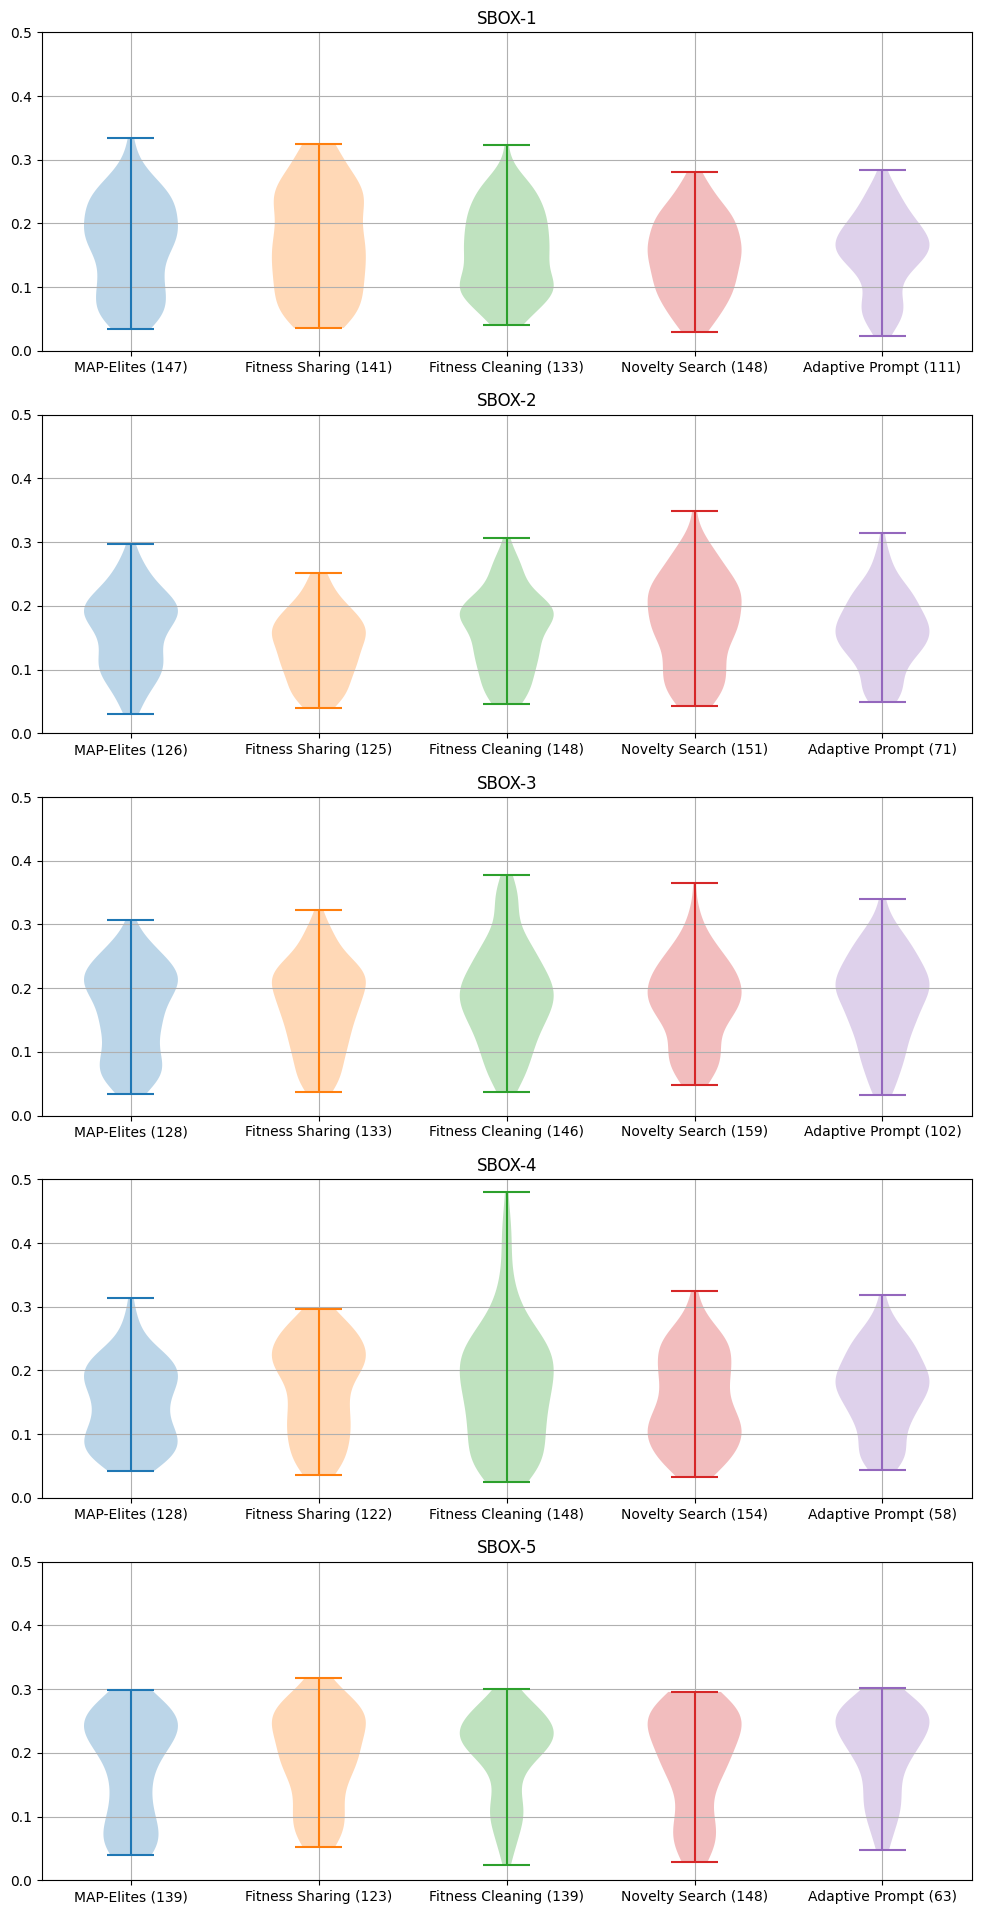

In [6]:
import matplotlib.pyplot as plt 

def plot_comparison_violins(dataframe: pd.DataFrame, ignore_failed: bool):
    fig = plt.figure(figsize=(12, 24))
    ax = fig.subplots(len(dataframe['MAP-Elites']), 1)

    if ignore_failed:
        dataframe = dataframe.copy(deep=True)
        for index, row in dataframe.iterrows():
            for method in dataframe.columns:
                data = row[method]
                new_data = [datum for datum in data if datum != 0]
                row[method] = new_data

    for index, axis in enumerate(ax):
        axis.set_title(f'SBOX-{index + 1}')
        axis.set_ylim(ymin=0, ymax=0.5)
        axis.set_xticks(range(len(dataframe.columns)))
        x_tick_labels = [
            f"{method} ({len(dataframe.iloc[index][method])})"
            for method in dataframe.columns
        ]
        axis.set_xticklabels(x_tick_labels)
        axis.grid()

    for method_index, row in dataframe.iterrows():
        for axis_index, method in enumerate(dataframe.columns):
            ax[axis_index].violinplot(row[method], vert= True, positions=[method_index])
    plt.show()

plot_comparison_violins(df, True)





# plt.figure(figsize=(12, 12))
# plt.boxplot(data, vert=True)

# plt.figure(figsize=(12, 12))
# plt.hist(data, bins=10, )

In [7]:
import numpy as np

def generate_sigma_mu_data(dataframe: pd.DataFrame, ignore_failed: bool) -> pd.DataFrame:
    return_dataframe = pd.DataFrame()
    if ignore_failed:
        dataframe = dataframe.copy(deep=True)
        for index, row in dataframe.iterrows():
            for method in dataframe.columns:
                data = row[method]
                new_data = [datum for datum in data if datum != 0]
                row[method] = new_data
    for method in dataframe.columns:
        mus = []
        sigmas = []
        for _, row in dataframe.iterrows():
            mu = np.mean(row[method])
            sigma = np.std(row[method])
            mus.append(mu)
            sigmas.append(sigma)
        return_dataframe[f'{method}-mu'] = mus
        return_dataframe[f'{method}-sigma'] = sigmas
    return return_dataframe

generate_sigma_mu_data(df, False)

,MAP-Elites-mu,MAP-Elites-sigma,Fitness Sharing-mu,Fitness Sharing-sigma,Fitness Cleaning-mu,Fitness Cleaning-sigma,Novelty Search-mu,Novelty Search-sigma,Adaptive Prompt-mu,Adaptive Prompt-sigma
0,0.120760,0.095627,0.114095,0.089991,0.109715,0.096330,0.108917,0.084755,0.099577,0.107415
1,0.108443,0.105343,0.086562,0.079123,0.126902,0.095479,0.131137,0.098157,0.068368,0.101818
2,0.100184,0.091622,0.106465,0.090818,0.138002,0.107202,0.138821,0.109553,0.100670,0.109826
3,0.095296,0.086680,0.106453,0.101844,0.131722,0.097111,0.118117,0.089990,0.054677,0.095170
4,0.106848,0.087025,0.098453,0.090248,0.127147,0.102434,0.125246,0.092508,0.064837,0.102522


# Plot distribution of the fitneess, overlapped.

In [8]:
plt.figure(figsize=(12, 12))
stats = generate_sigma_mu_data(df, True)          # try viewing both true and false for ignore_failed solutions option.



for i in range(stats.shape[1]//2):
    x = [(6 * idx) + i  for idx in range(stats.shape[0])]
    plt.errorbar(x, stats[stats.columns[2 * i]], stats[stats.columns[2 * i + 1]], label=stats.columns[2 * i][:-3], fmt='o', capsize=6)
plt.ylim(0, 0.4)
plt.xticks([6 * i + 2 for i in range(stats.shape[0])], [f'SBOX-{i + 1}' for i in range(stats.shape[0])])
plt.title("Fitness (mu ± sigma) for various optimisers on different problems.")
plt.legend()

NameError: name 'plt' is not defined

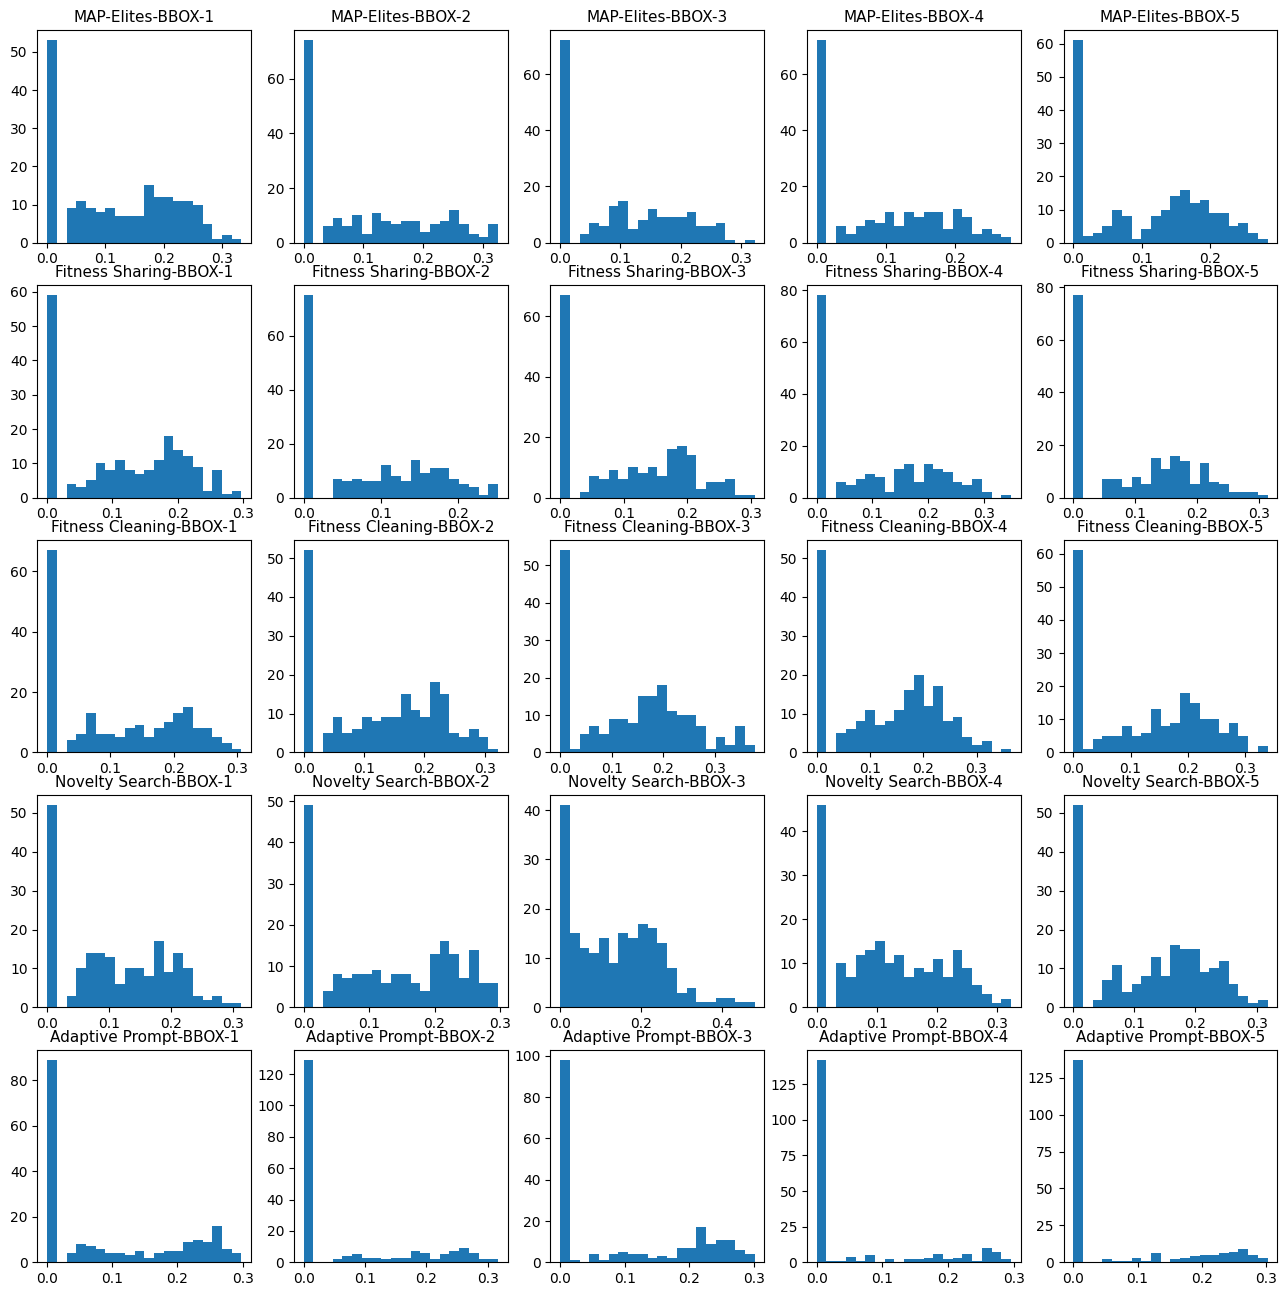

In [9]:

def plot_histogram(dataframe: pd.DataFrame, ignore_failed: bool):
    fig = plt.figure(figsize=(16, 16))
    axes = fig.subplots(*dataframe.shape)
    if ignore_failed:
        dataframe = dataframe.copy(deep=True)
        for index, row in dataframe.iterrows():
            for method in dataframe.columns:
                data = row[method]
                new_data = [datum for datum in data if datum != 0]
                row[method] = new_data
    
    for i, method in enumerate(dataframe.columns):
        for j, series in enumerate(dataframe[method]):
            axes[i][j].hist(series, bins=20)
            axes[i][j].set_title(f'{method}-BBOX-{j + 1}', fontsize=11)
        
plot_histogram(df, ignore_failed=False)

## Diagonsis of Adaptive Prompt opimiser failure.
* The adaptive prompt has the higest failure rate ranging between 85-130 of 200 evaluations, diagnosis of what error was most encountered.
    * The program generated CodeNotFound erception upto 95 times in a run, see next 2 cells.

In [9]:
import re
from dataclasses import dataclass

@dataclass
class ErrorClass:
    gen:int
    error: str
    message: str

def get_feedbacks(for_method):
    feedback = {}
    file_collections = get_log_files()
    match for_method:
        case 'MAP-Elites': file_collections = file_collections['run-MAP-b-SBOX']
        case 'Fitness Sharing': file_collections = file_collections['run-FS-b-SBOX']
        case 'Fitness Cleaning': file_collections = file_collections['run-FC-b-SBOX']
        case 'Novelty Search': file_collections = file_collections['run-NS-b-SBOX']
        case 'Adaptive Prompt': file_collections = file_collections['run-ES-Adapt-SBOX']
        case _: ValueError('Unknown case {for_method}')
    for file in file_collections:
        file_feedback = []
        with open(file) as f:
            for index, line in enumerate(f.readlines()):
                data = json.loads(line)
                if data['error']:
                    for error, msg in re.findall(r'^(\w+Error|Exception)\b(.*)', data['error'], re.MULTILINE):
                            file_feedback += [ErrorClass(index + 1, error, msg[2:])]
        feedback[file] = file_feedback
    return feedback

get_feedbacks('Adaptive Prompt')

{'SBOX_diversity/run-ES-Adapt-SBOX-1/log.jsonl': [ErrorClass(gen=7, error='ValueError', message='The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()'),
  ErrorClass(gen=9, error='NameError', message="name 'Optional' is not defined"),
  ErrorClass(gen=10, error='NameError', message="name 'Optional' is not defined"),
  ErrorClass(gen=12, error='SyntaxError', message="unmatched ')'"),
  ErrorClass(gen=13, error='SyntaxError', message='invalid syntax'),
  ErrorClass(gen=14, error='IndentationError', message='unexpected indent'),
  ErrorClass(gen=15, error='Exception', message='Could not extract generated code. The code should be encapsulated with ``` in your response.'),
  ErrorClass(gen=16, error='NameError', message="name 'Optional' is not defined"),
  ErrorClass(gen=17, error='NameError', message="name 'Any' is not defined. Did you mean: 'any'?"),
  ErrorClass(gen=18, error='SyntaxError', message='invalid syntax'),
  ErrorClass(gen=19, error='Name

In [10]:
from typing import Any
from collections import defaultdict

def collect_errors(method: str) -> dict[Any, Any]:
    data = get_feedbacks(method)
    file_wise_groups = {}
    for file, error in data.items():
        groups = defaultdict(list)
        for e in error:
            key = (e.error, e.message)
            groups[key].append(e)
        file_wise_groups[file] = groups
    return file_wise_groups

data = collect_errors('Adaptive Prompt')
for filename, errors in data.items():
    print(f'--------------------File: {filename}--------------------')
    for error in sorted(errors):
        error_objects = errors[error]
        print("\t", error, f'Count: ({len(error_objects)})')
        print('\t\t', error_objects[0].error, error_objects[0].message, 'generations: ', [o.gen for o in error_objects])


--------------------File: SBOX_diversity/run-ES-Adapt-SBOX-1/log.jsonl--------------------
	 ('Exception', 'Could not extract generated code. The code should be encapsulated with ``` in your response.') Count: (44)
		 Exception Could not extract generated code. The code should be encapsulated with ``` in your response. generations:  [15, 20, 25, 34, 40, 49, 54, 56, 59, 60, 64, 71, 73, 77, 79, 84, 88, 93, 94, 97, 98, 104, 108, 109, 114, 115, 117, 118, 123, 124, 131, 136, 137, 144, 149, 151, 154, 161, 184, 185, 189, 192, 194, 196]
	 ('IndentationError', 'unexpected indent') Count: (1)
		 IndentationError unexpected indent generations:  [14]
	 ('IndexError', 'index 8 is out of bounds for axis 0 with size 2') Count: (1)
		 IndexError index 8 is out of bounds for axis 0 with size 2 generations:  [105]
	 ('KeyError', "''") Count: (1)
		 KeyError '' generations:  [103]
	 ('LinAlgError', 'SVD did not converge') Count: (1)
		 LinAlgError SVD did not converge generations:  [199]
	 ('NameError', 

# Code Similarity Based Diversity Research.

## Priliminary Diff
* LLM often returns small diffs on the code that has been provided as an example, so implementing Confusion Matrics for:
    $$\sim(c_i, c_j) \forall i \ne j $$

In [11]:
def get_codes(for_method) -> dict[str, list[str]]:
    file_collections = get_log_files()
    code_collection = {}
    match for_method:
        case 'MAP-Elites': file_collections = file_collections['run-MAP-b-SBOX']
        case 'Fitness Sharing': file_collections = file_collections['run-FS-b-SBOX']
        case 'Fitness Cleaning': file_collections = file_collections['run-FC-b-SBOX']
        case 'Novelty Search': file_collections = file_collections['run-NS-b-SBOX']
        case 'Adaptive Prompt': file_collections = file_collections['run-ES-Adapt-SBOX']
        case _: ValueError('Unknown case {for_method}')
    
    for file in file_collections:
        codes : list[str] = []
        with open(file) as f:
            lines = f.readlines()
            for line in lines:
                data = json.loads(line)
                code = data['code']
                codes.append(code)
        code_collection[file] = codes
    return code_collection

In [ ]:
import difflib
import ast
import astor

def get_similarity_ratio(code1:str, code2:str) -> float:
    def code_to_ast_string(code: str):
        tree = ast.parse(code)
        return astor.to_source(tree)  # normalized representation

    try:
        code1_ast = code_to_ast_string(code1)
        code2_ast = code_to_ast_string(code2)
    except:
        return 0

    return difflib.SequenceMatcher(None, code1_ast, code2_ast).ratio()

code1 = """def add(a, b):
    return a + b"""

code2 = """def add(x, y):
    return x + y"""
get_similarity_ratio(code1, code2)

  Using cached astor-0.8.1-py2.py3-none-any.whl.metadata (4.2 kB)
Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)


0.875

In [ ]:
from joblib import Parallel, delayed
import os
def similarty_row(codes, index) -> tuple[int, list[int]]:
    if (index + 1) % 20 == 0:
        print(f"Started job {index + 1}.")
    row = []
    for j in range(index, len(codes)):
        sim = get_similarity_ratio(codes[index], codes[j])
        row.append((j, sim))
    return index, row

def get_confusion_matrix_joblib(for_method: str, fileindex: int | None):
    matrices = {}

    for file_name, codes in get_codes(for_method).items():
        if fileindex is None or str(fileindex) in file_name:
            print(f"Built Similarity matrix for {for_method}, using log file {file_name}.")

            n = len(codes)
            matrix = [[0.0] * n for _ in range(n)]

            # Set n_jobs = logical core count - 1, setting it = logical core count, leads to slow ui of computer.
            results = Parallel(n_jobs=9, backend="loky")(
                delayed(similarty_row)(codes, i)
                for i in range(n)
            )

            # fill matrix
            for i, row_data in results:
                for j, sim in row_data:
                    matrix[i][j] = sim
                    matrix[j][i] = sim
            filename = '-'.join([for_method, file_name.split('/')[-20][-1]]) 
            matrix = pd.DataFrame(data=matrix)
            matrix.to_csv(os.path.join(os.getcwd(), f'{filename}.csv')) #Log file.
            matrices[file_name] = matrix

    return matrices


In [33]:
for method in ['MAP-Elites', 'Fitness Sharing', 'Fitness Cleaning', 'Novelty Search', 'Adaptive Prompt']:
    get_confusion_matrix_joblib(method, None)

Built Similarity matrix for MAP-Elites, using log file SBOX_diversity/run-MAP-b-SBOX-1/log.jsonl.
Started job 20.
Started job 40.
Started job 60.
Started job 80.
Started job 100.
Started job 120.
Started job 140.
Started job 160.
Started job 180.
Started job 200.
Built Similarity matrix for MAP-Elites, using log file SBOX_diversity/run-MAP-b-SBOX-2/log.jsonl.
Started job 20.
Started job 40.
Started job 60.
Started job 80.
Started job 100.
Started job 120.
Started job 140.
Started job 160.
Started job 180.
Started job 200.
Built Similarity matrix for MAP-Elites, using log file SBOX_diversity/run-MAP-b-SBOX-3/log.jsonl.
Started job 20.
Started job 40.
Started job 60.
Started job 80.
Started job 100.
Started job 120.
Started job 140.
Started job 160.
Started job 180.
Started job 200.
Built Similarity matrix for MAP-Elites, using log file SBOX_diversity/run-MAP-b-SBOX-4/log.jsonl.
Started job 20.
Started job 40.
Started job 60.
Started job 80.
Started job 100.
Started job 120.
Started job 

/var/folders/rt/cwz37sl54rxgbd230xpd89yc0000gn/T/ipykernel_4164/190396153.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 12))


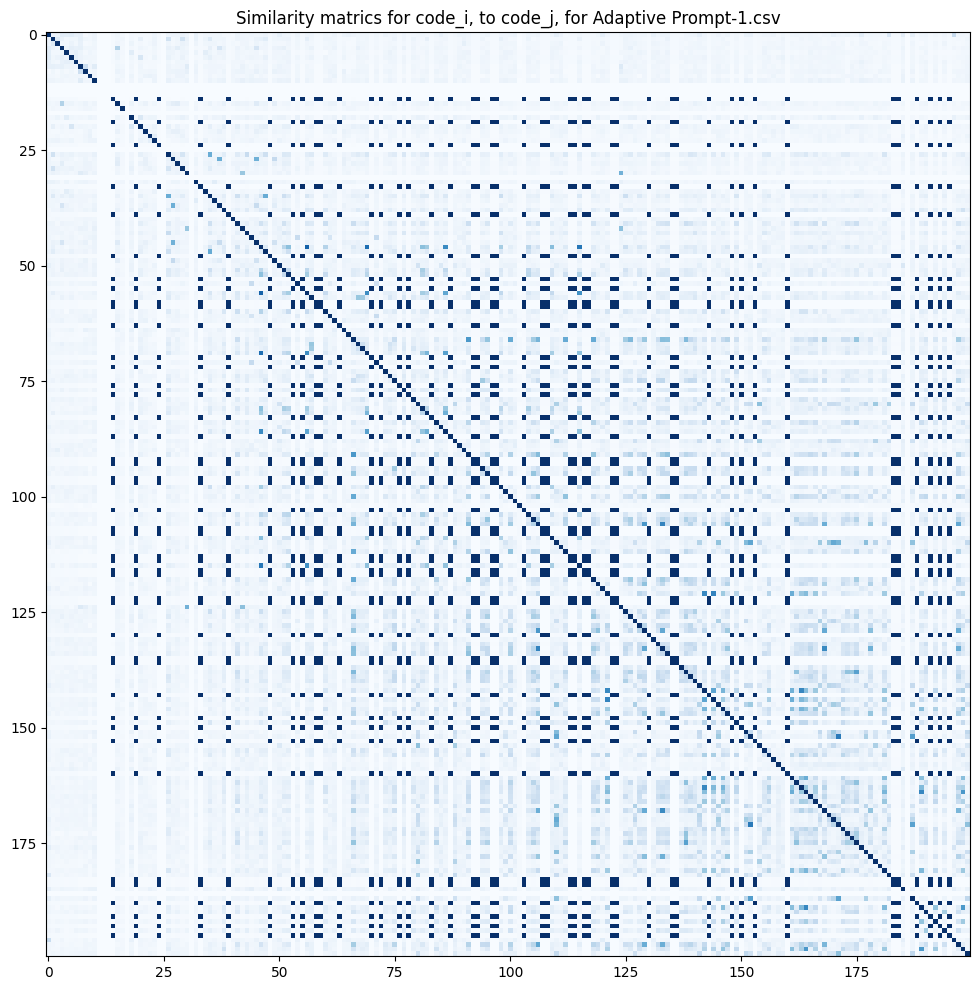

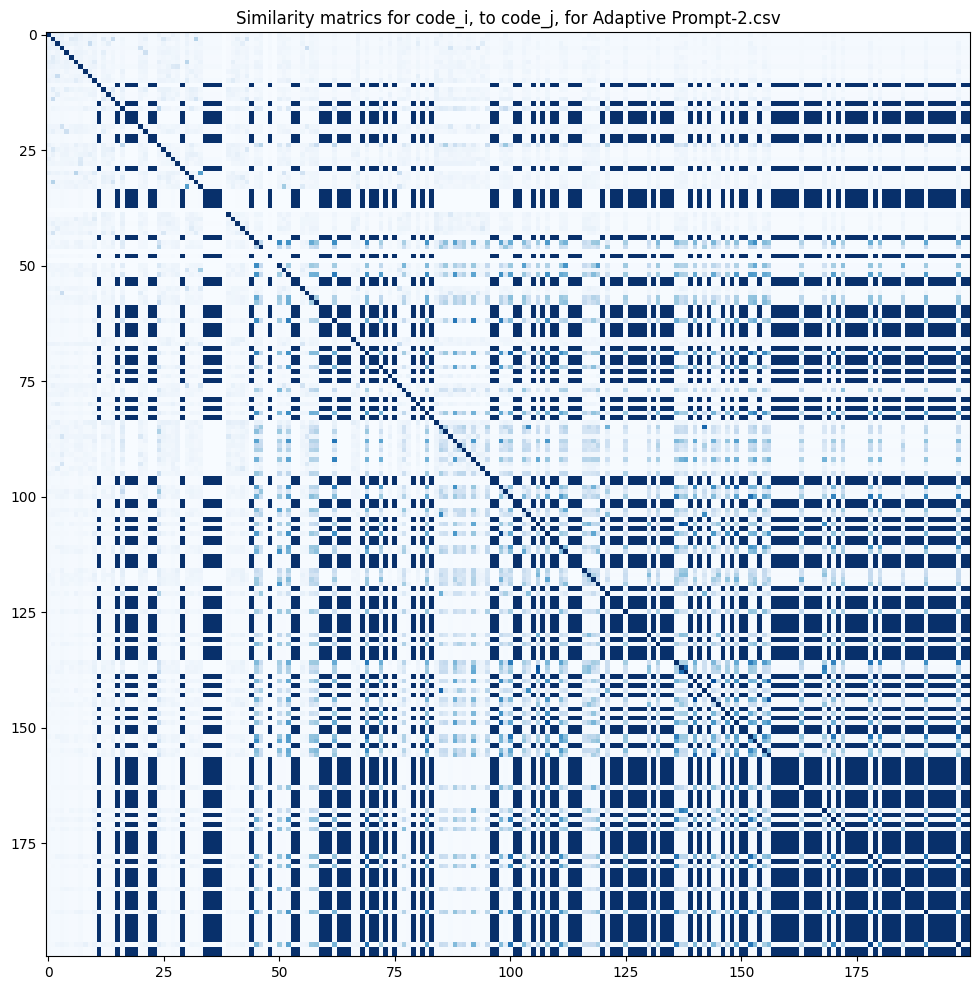

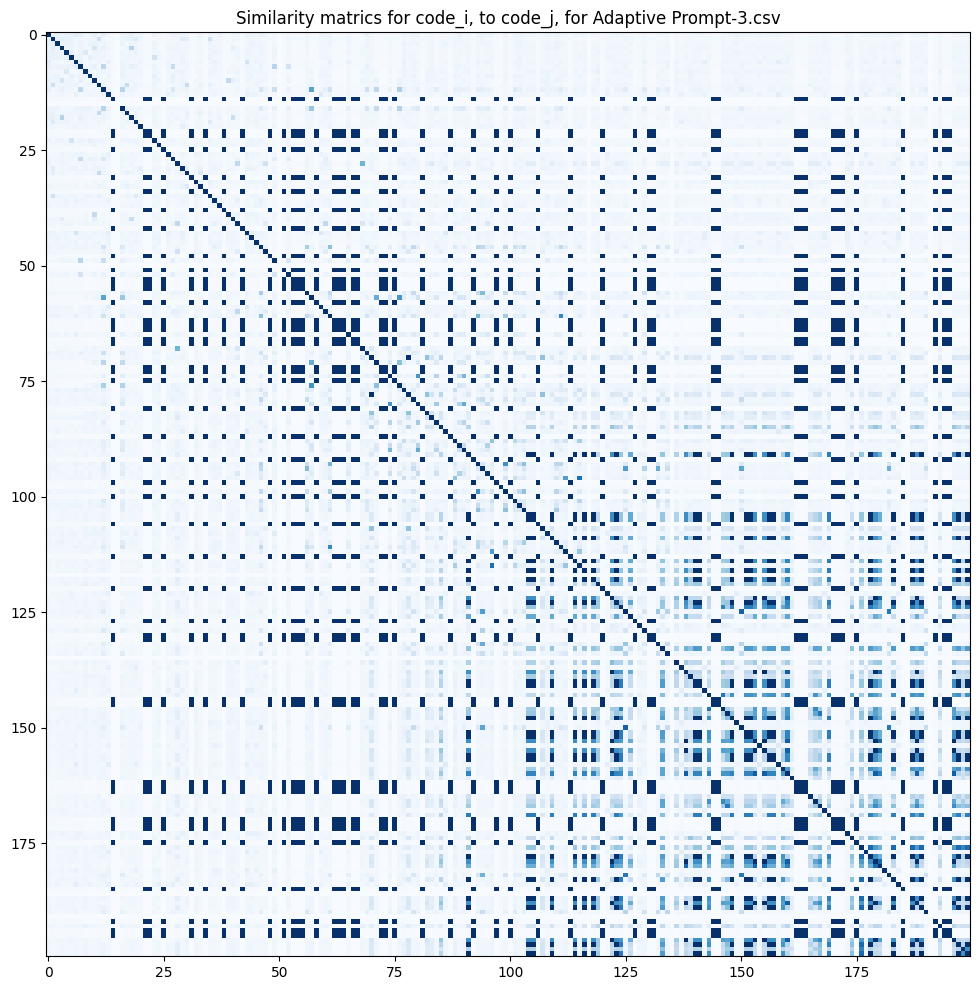

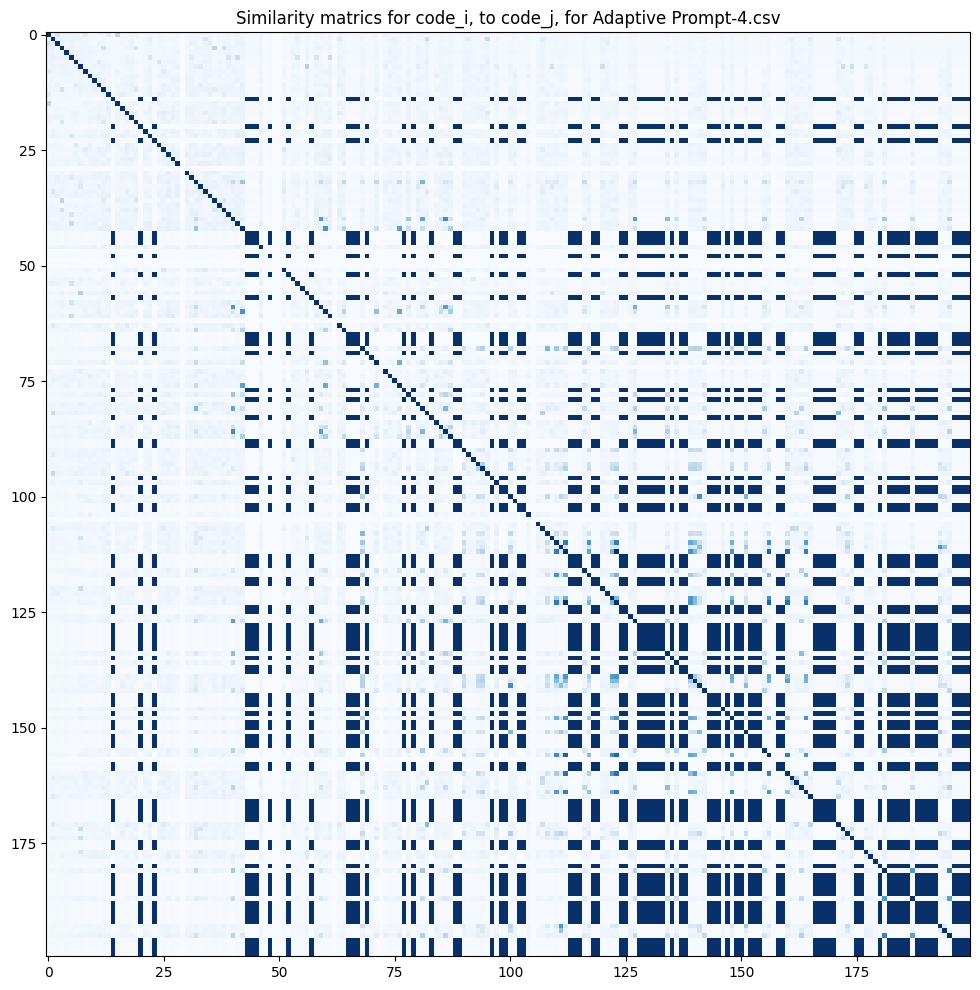

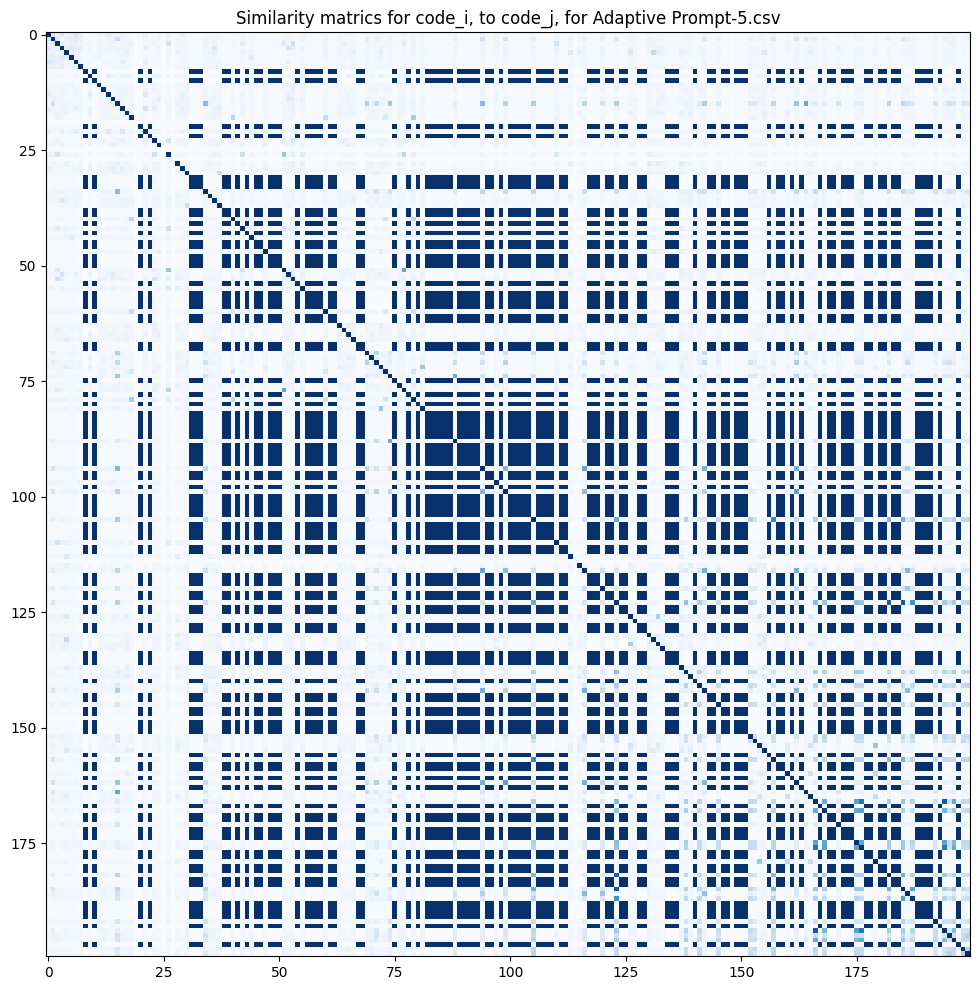

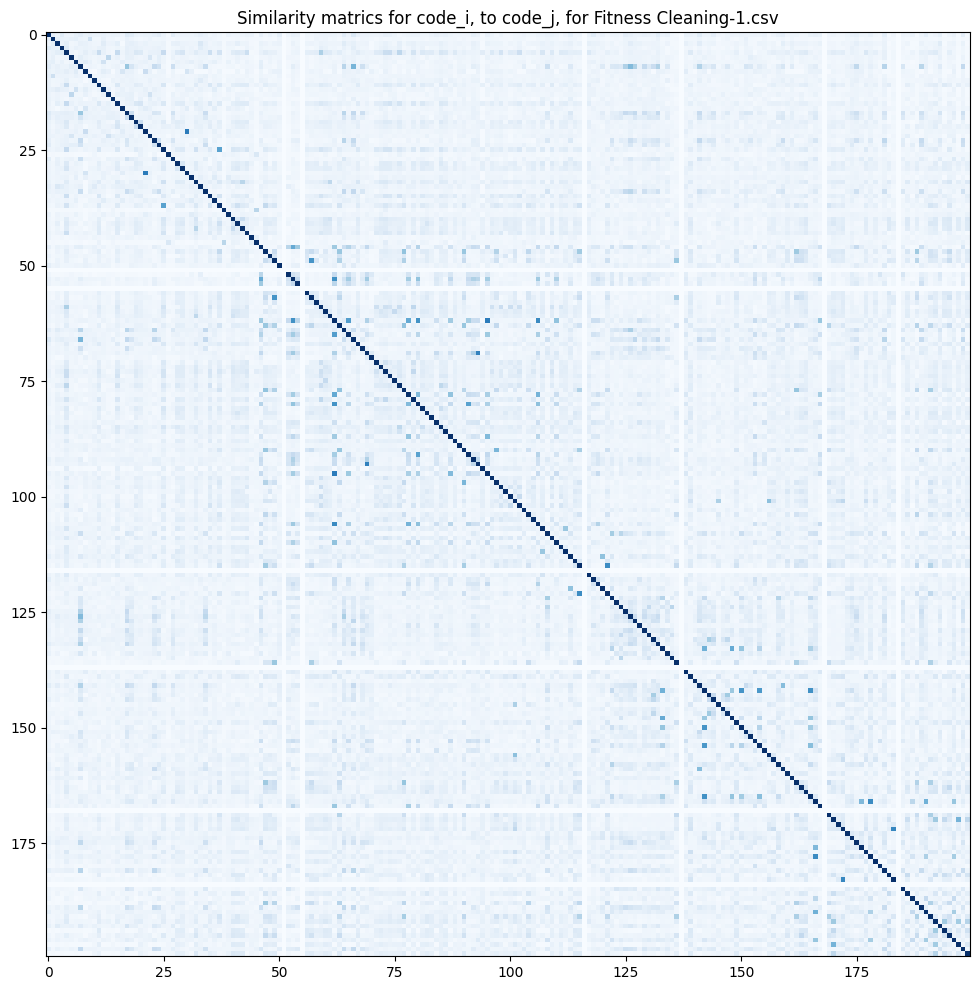

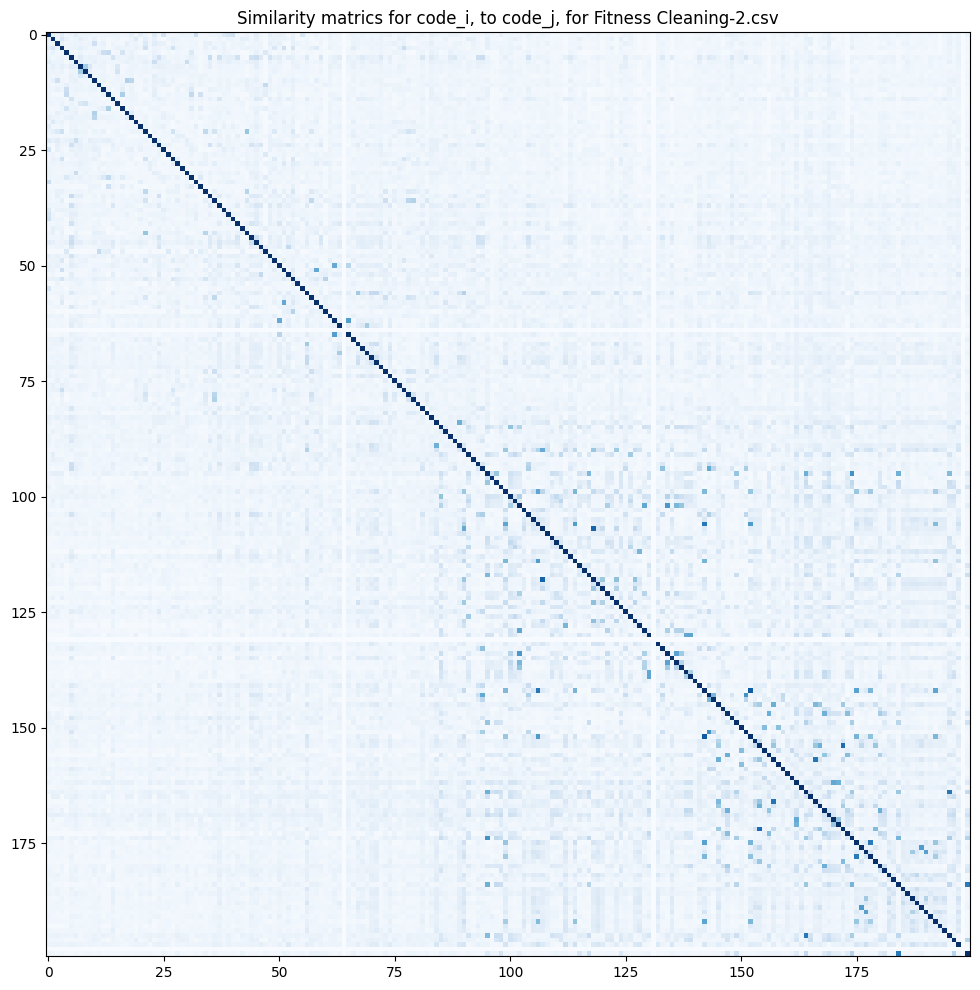

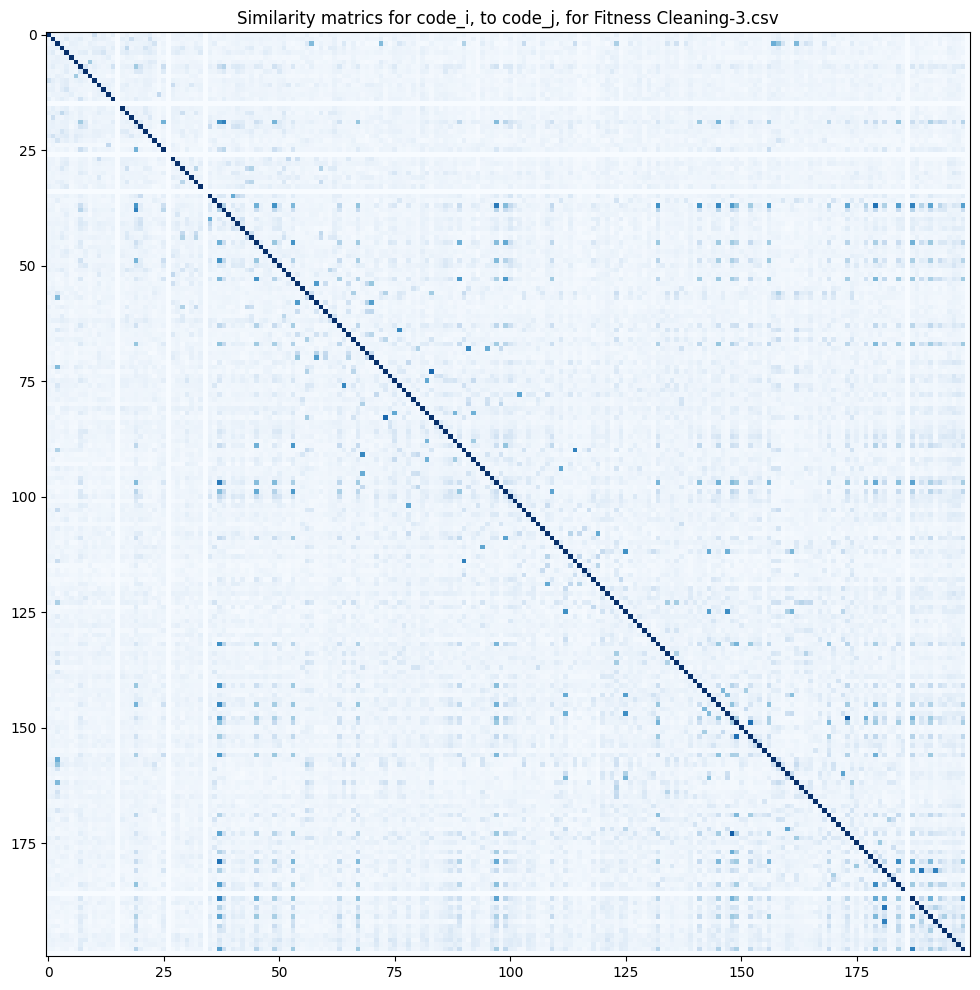

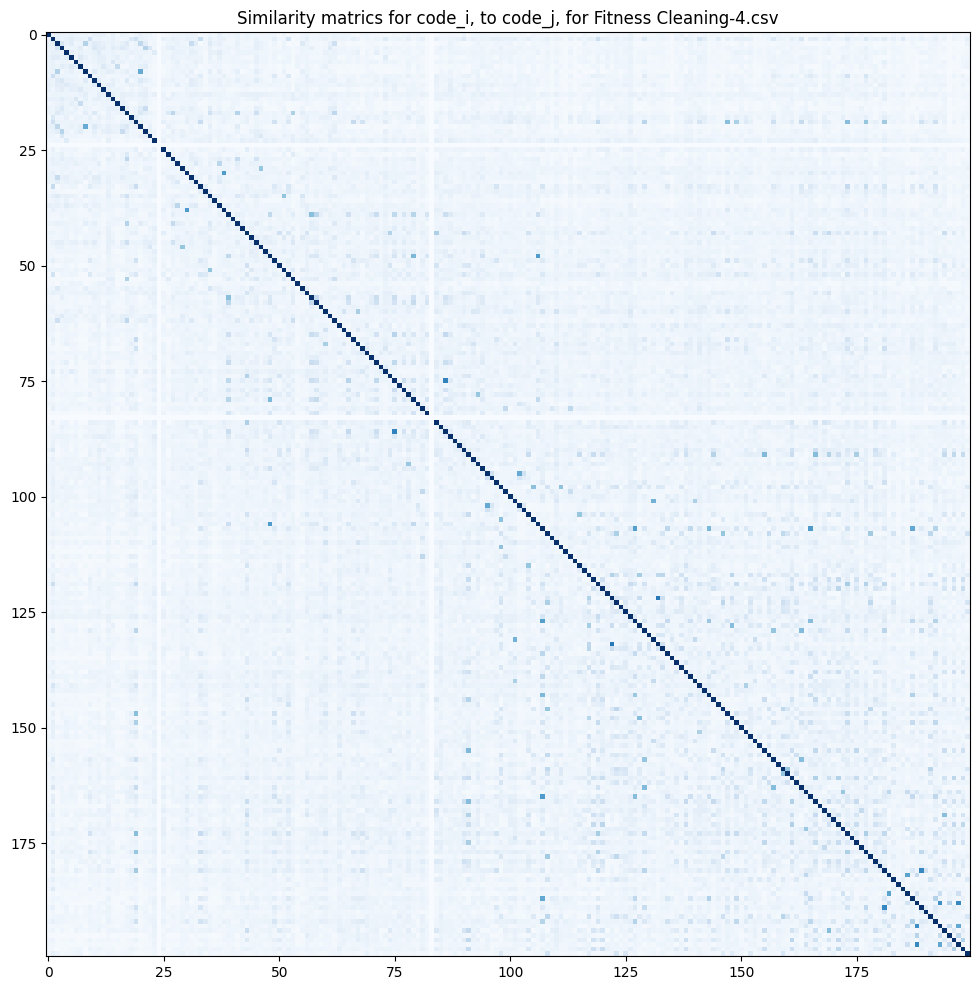

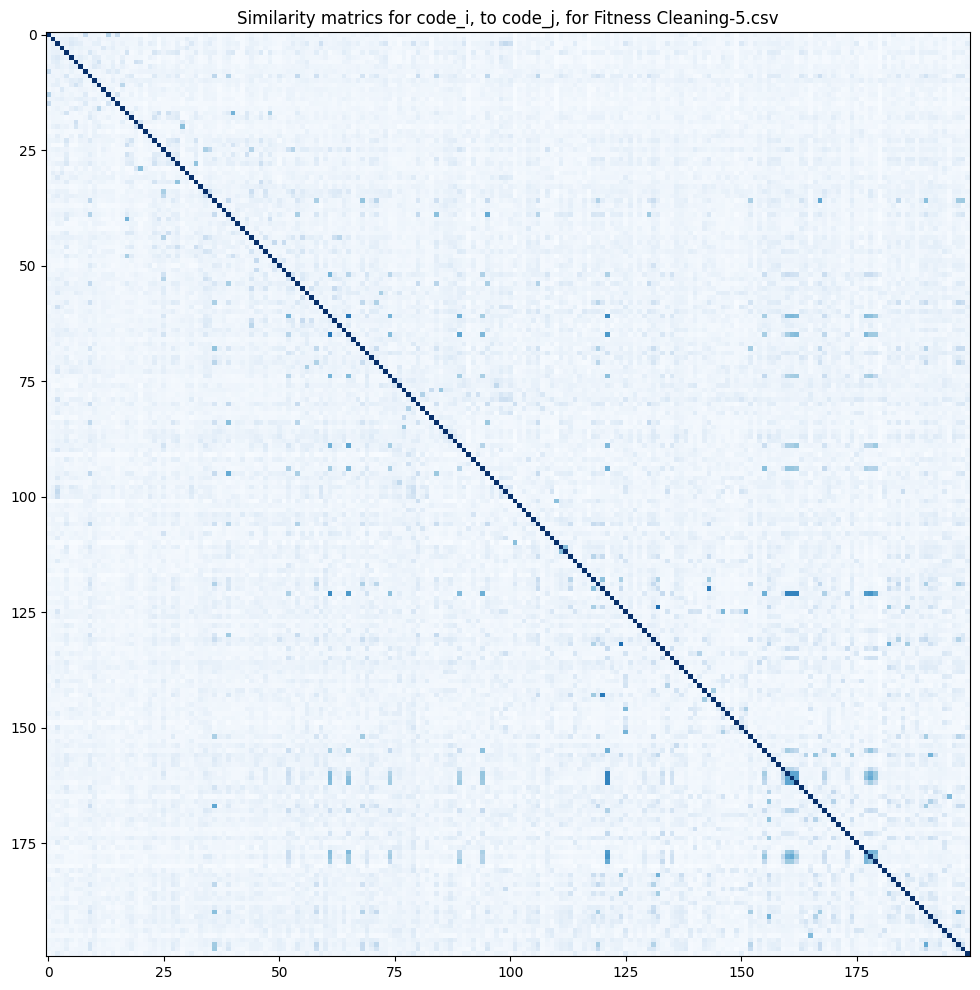

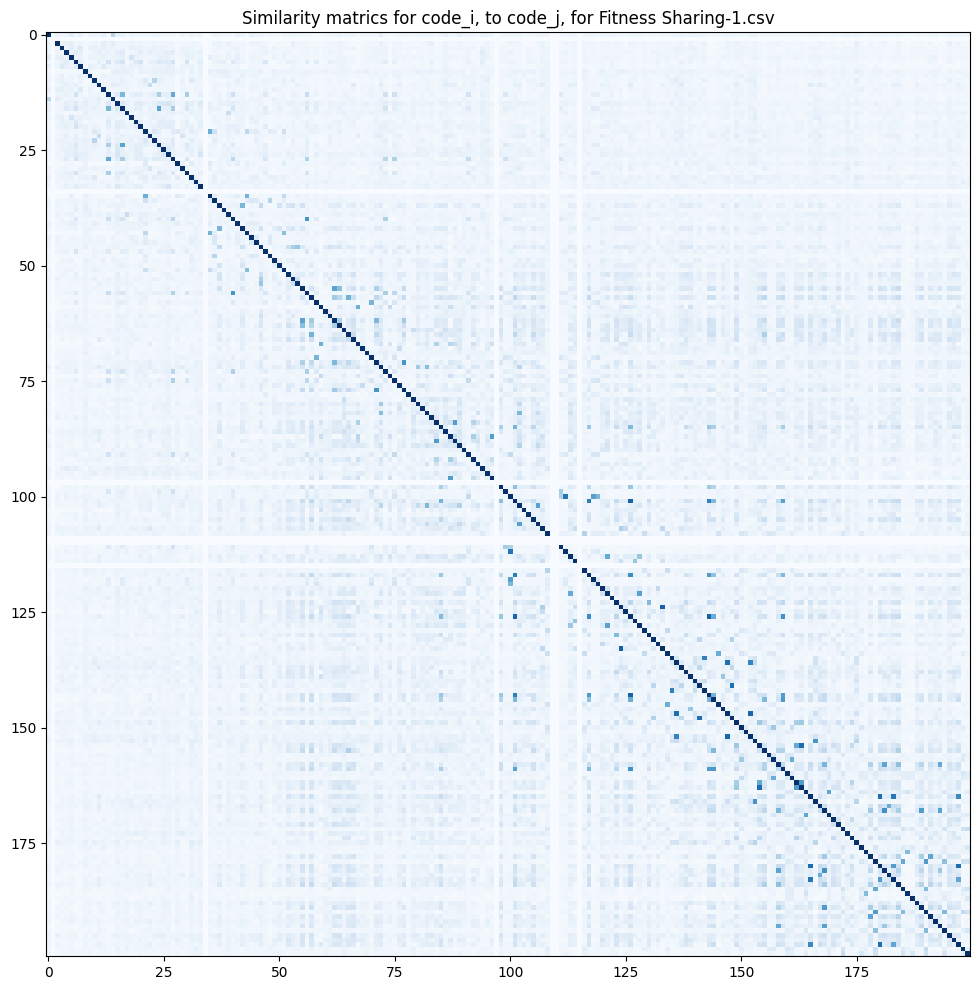

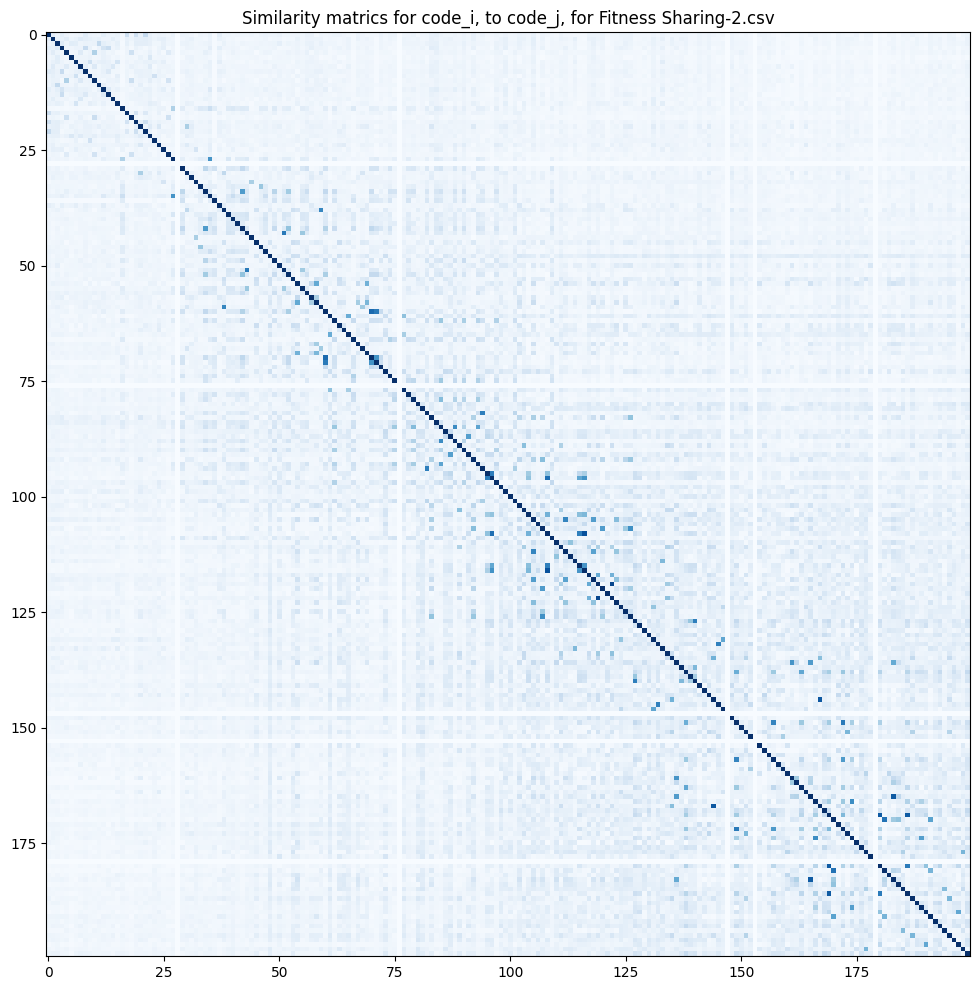

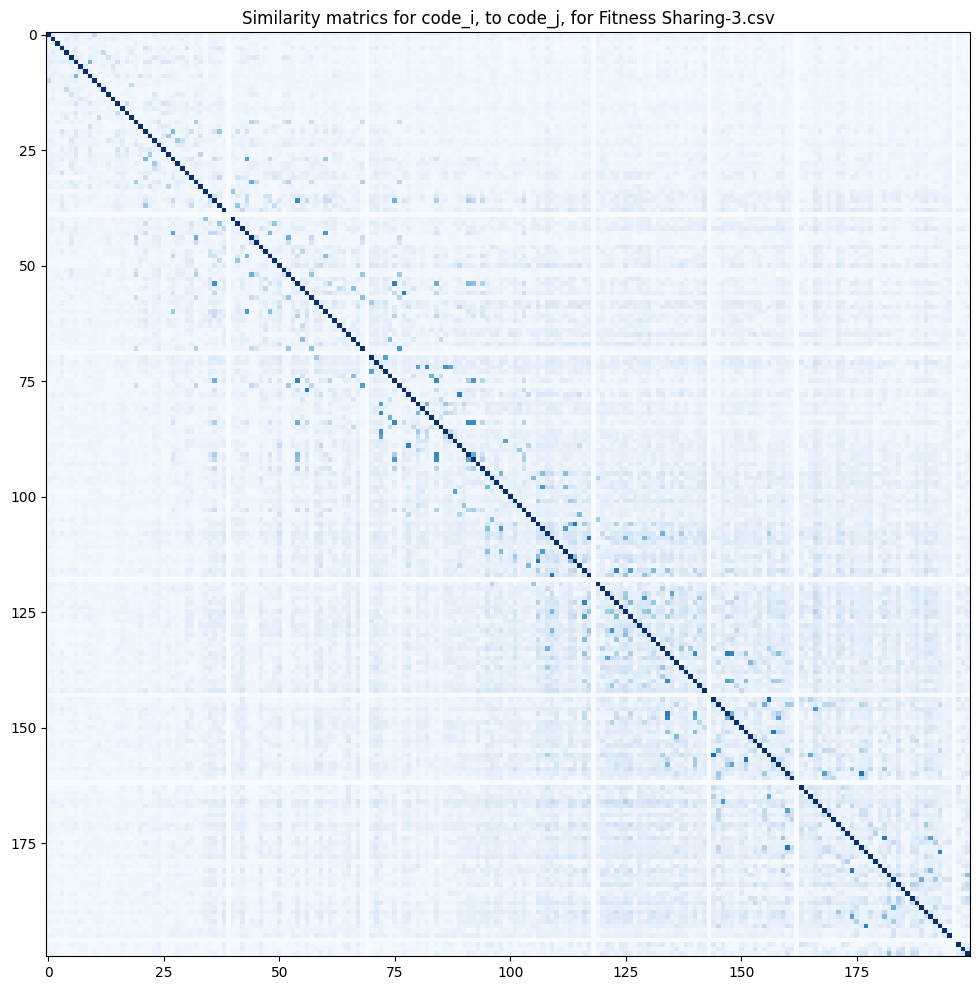

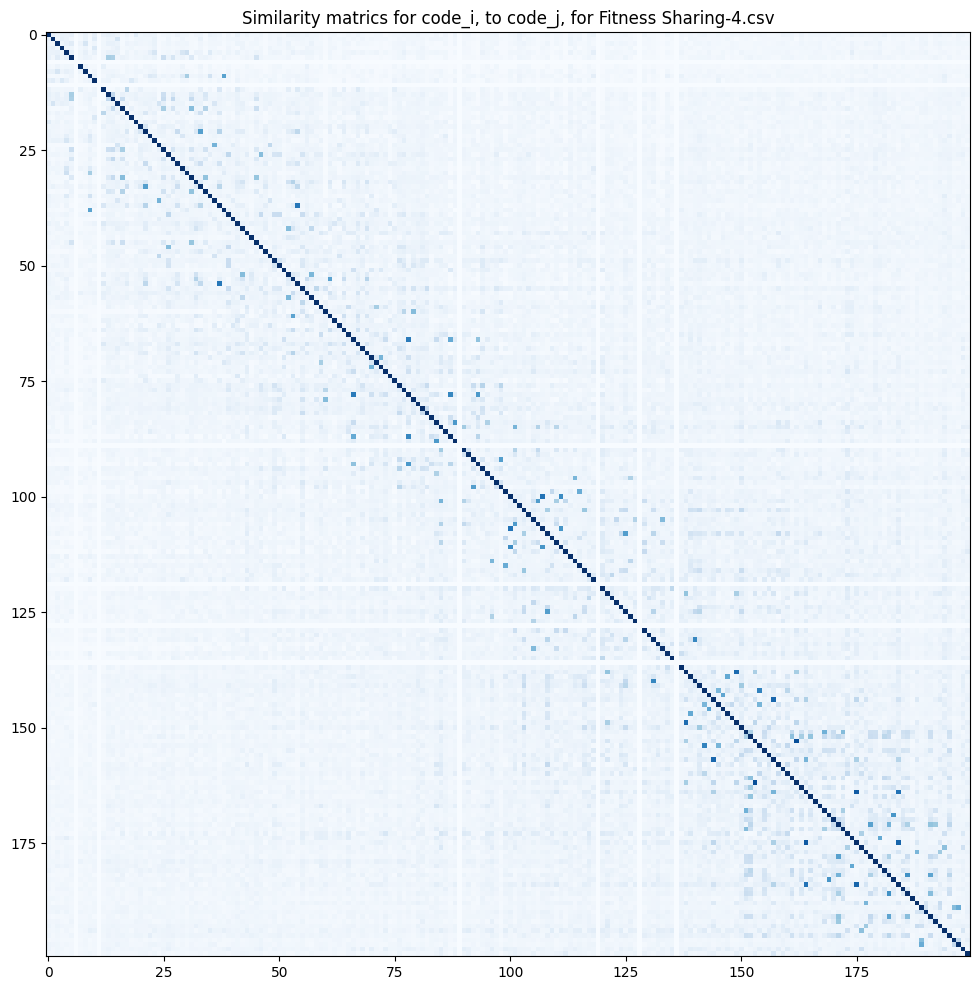

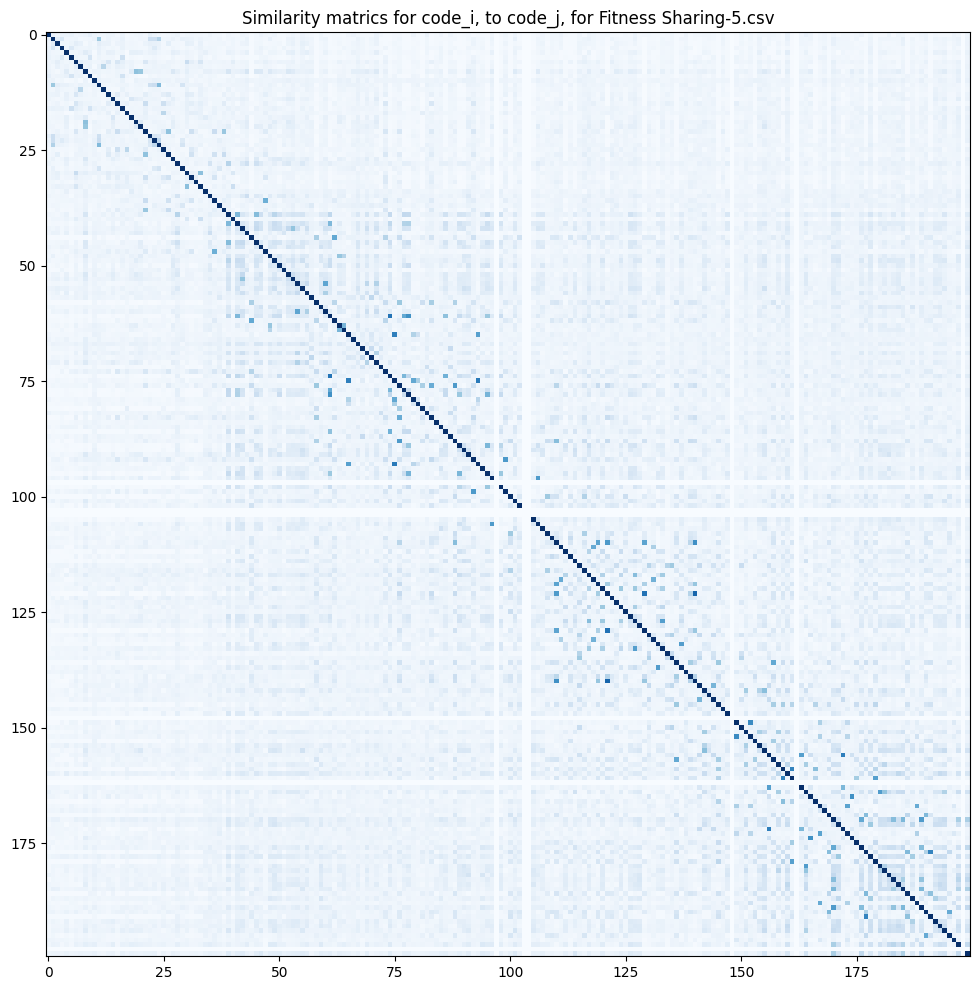

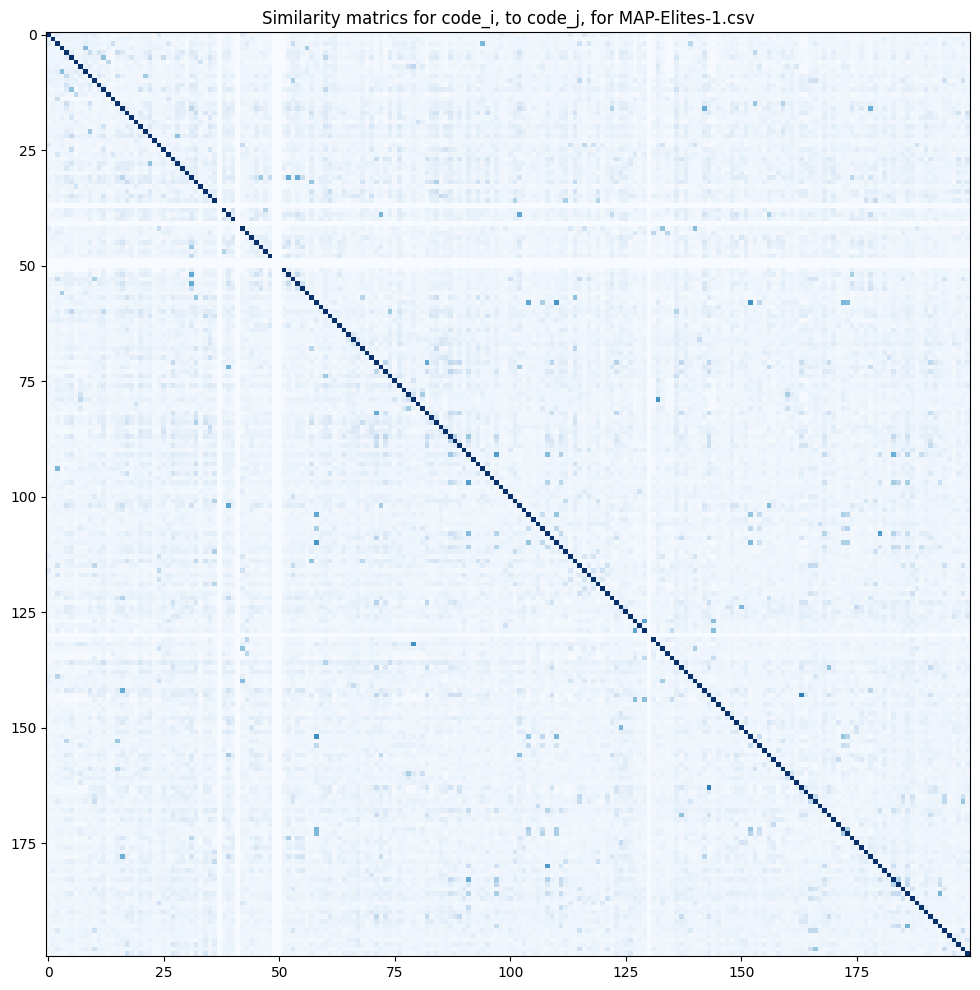

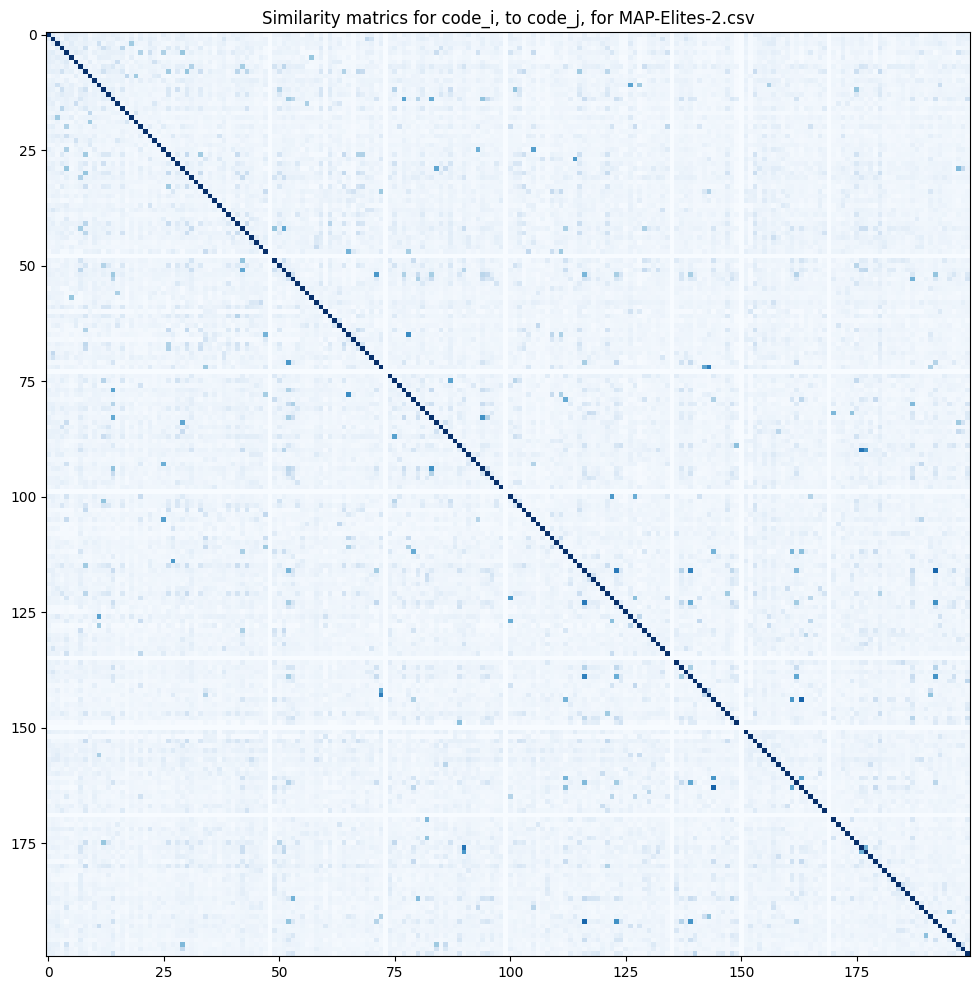

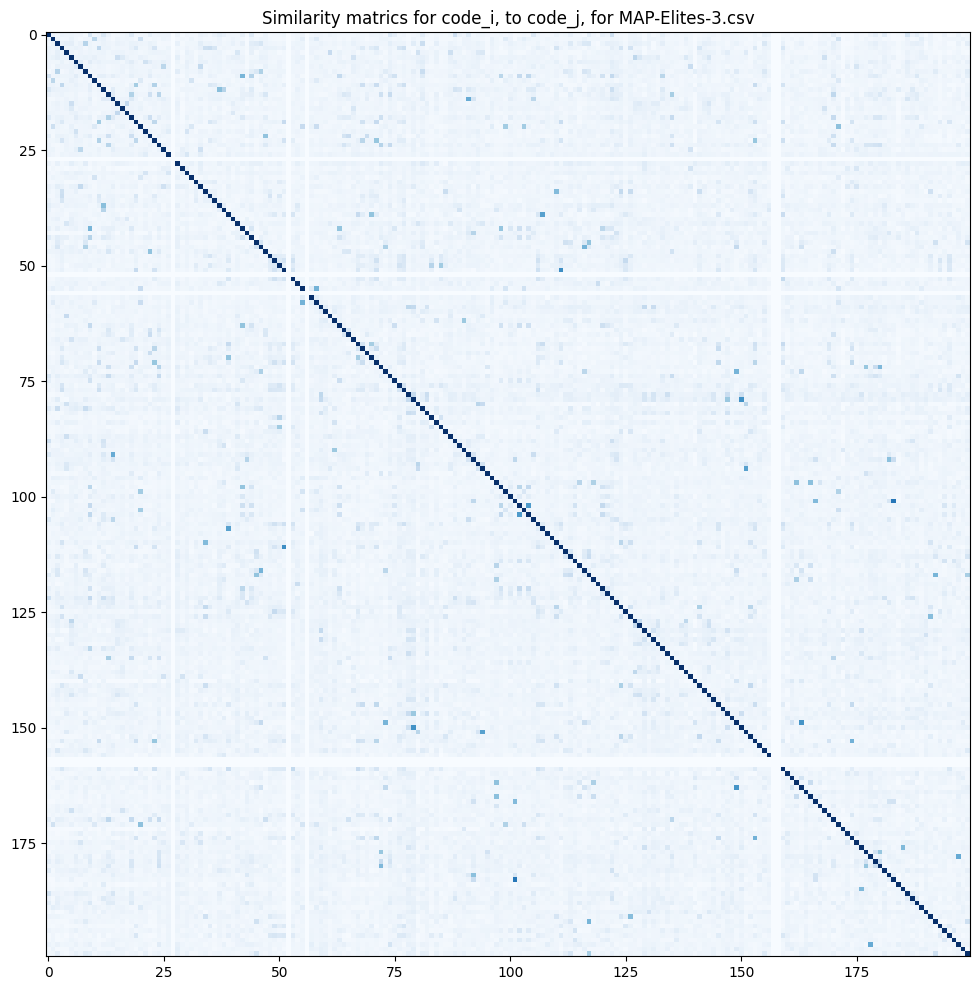

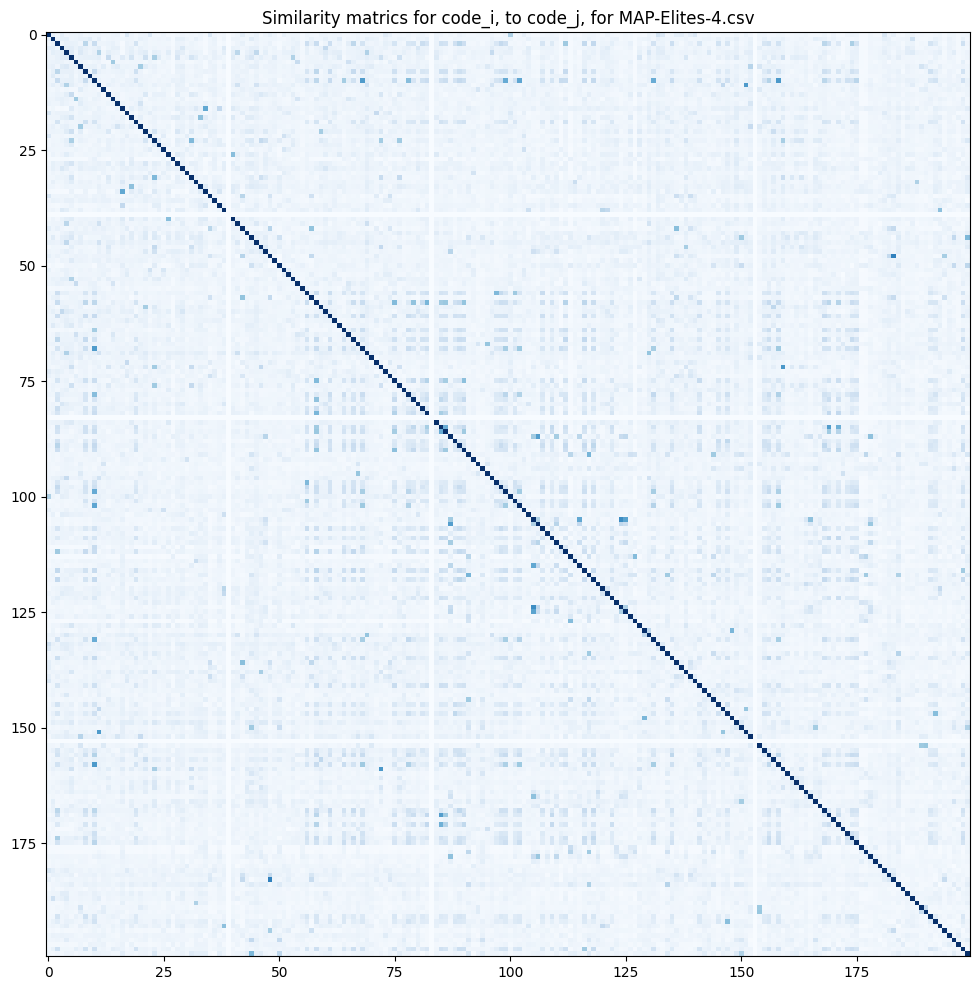

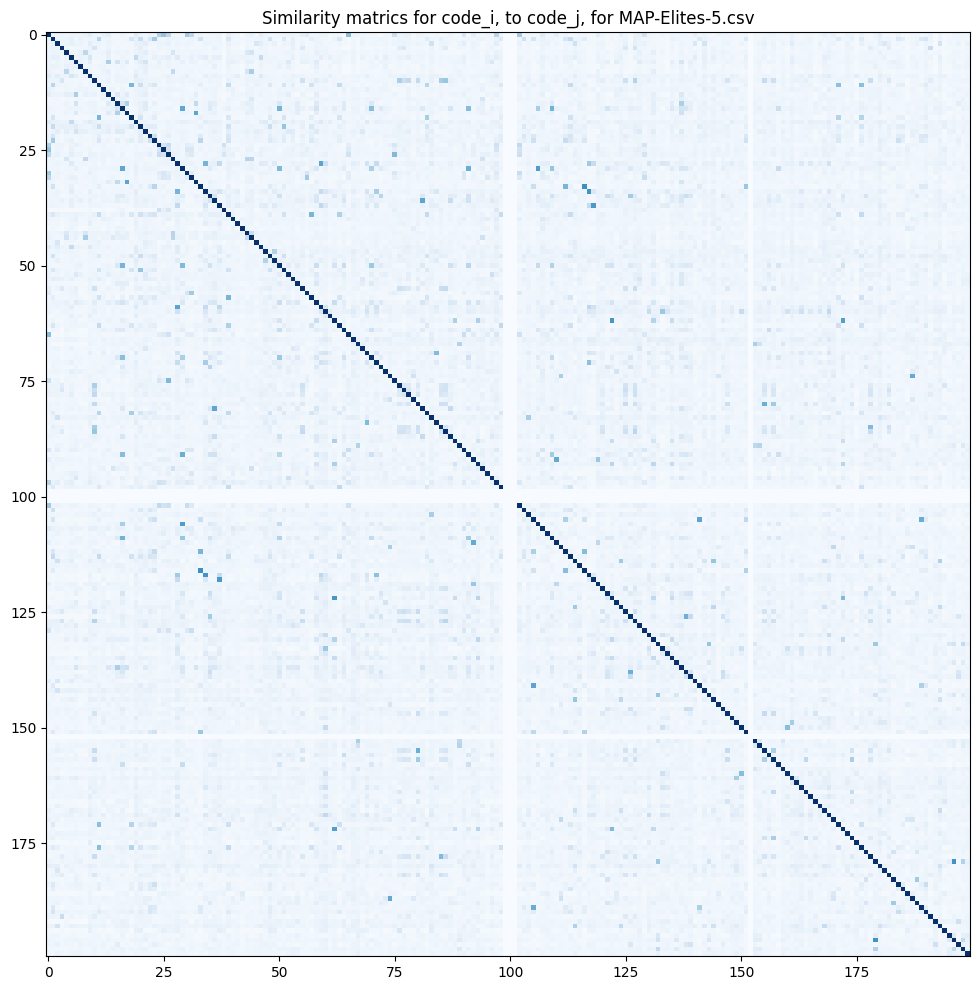

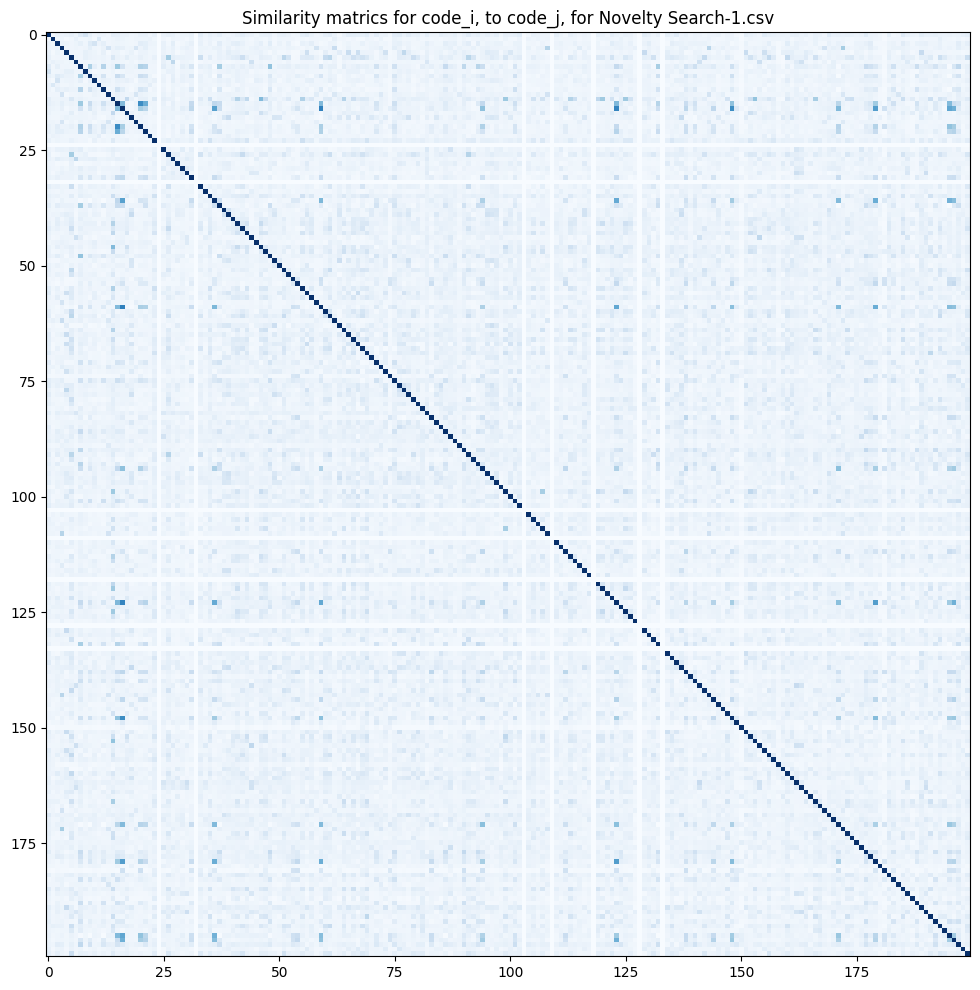

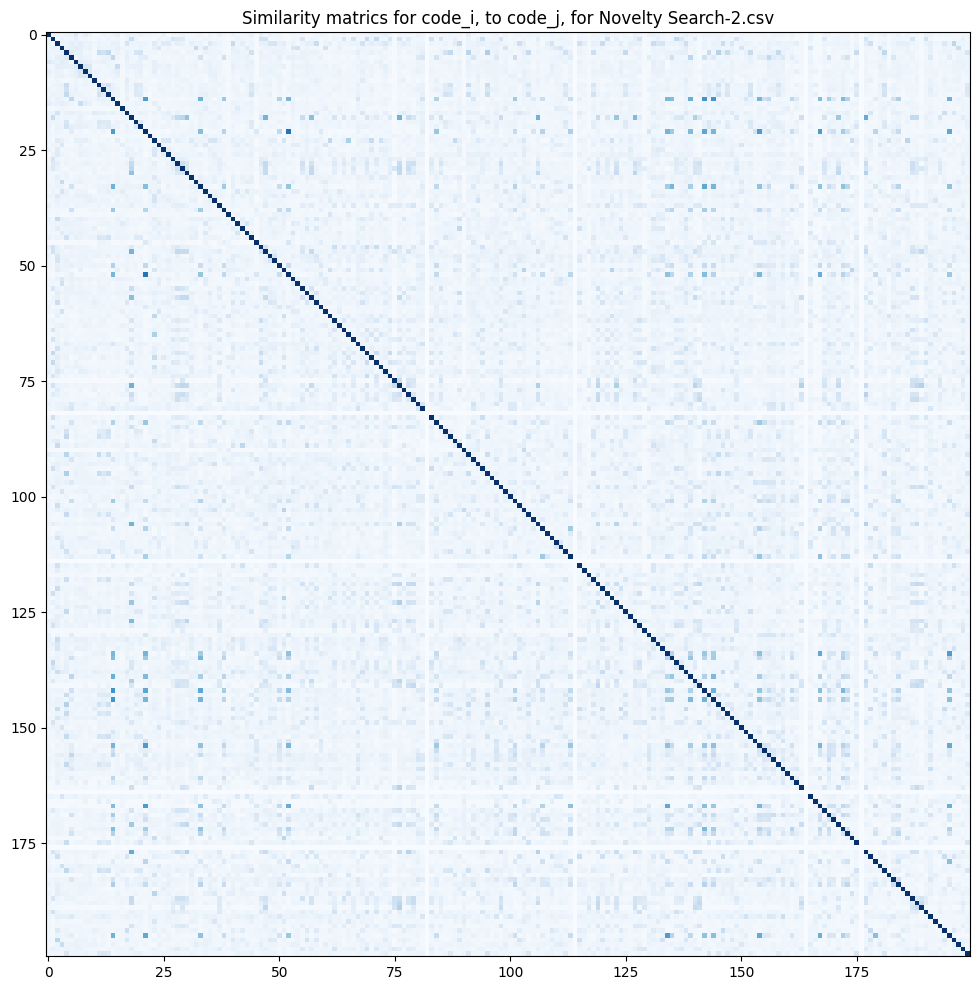

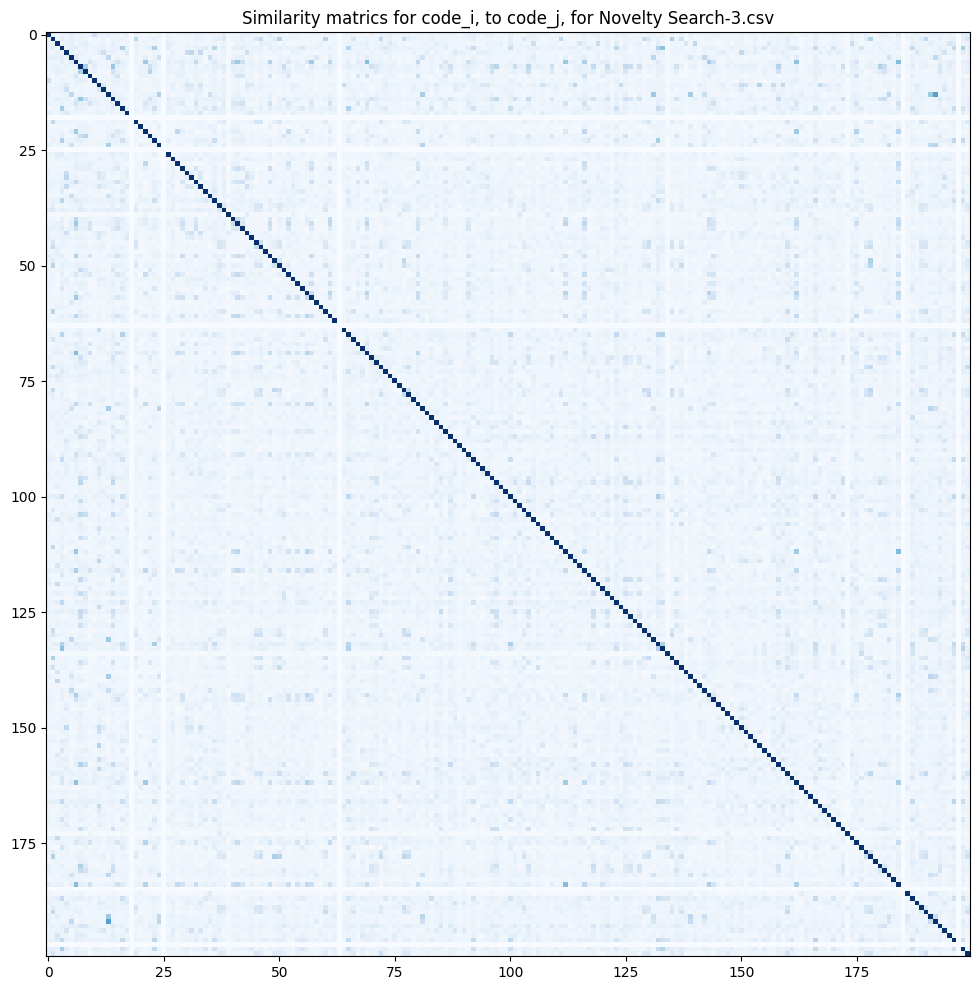

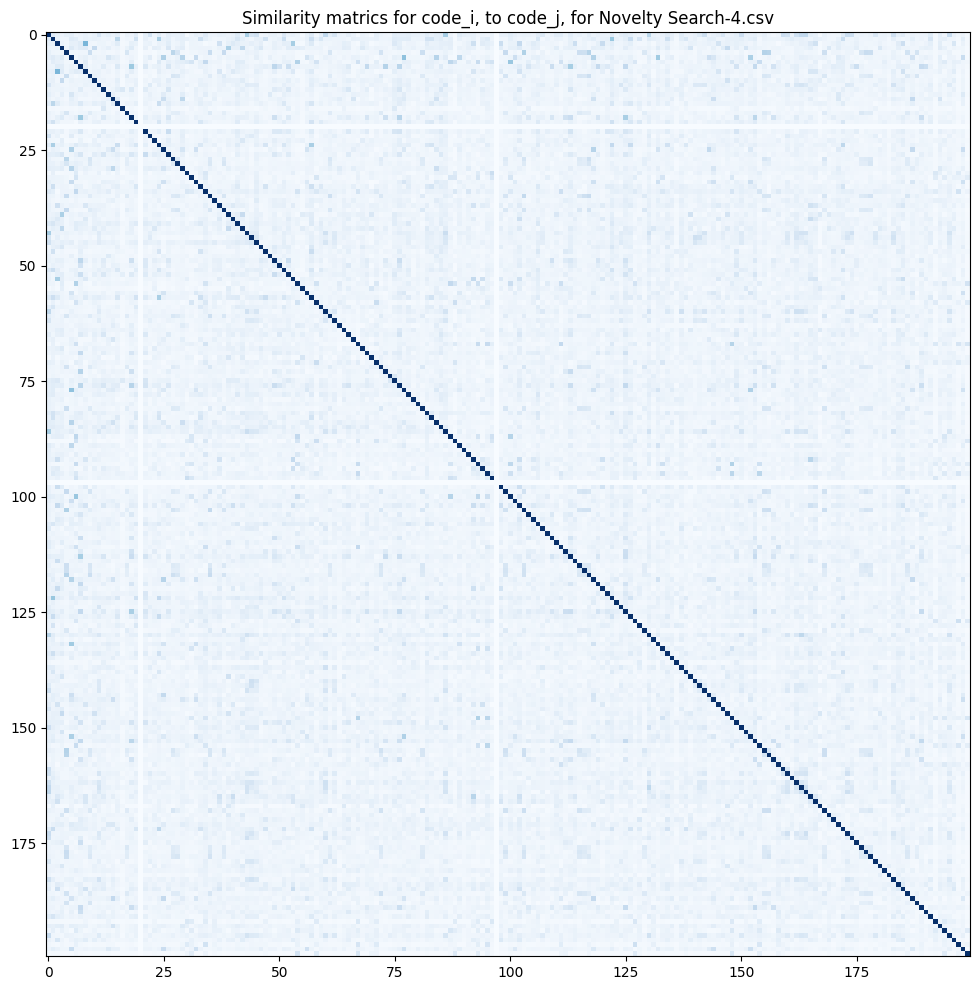

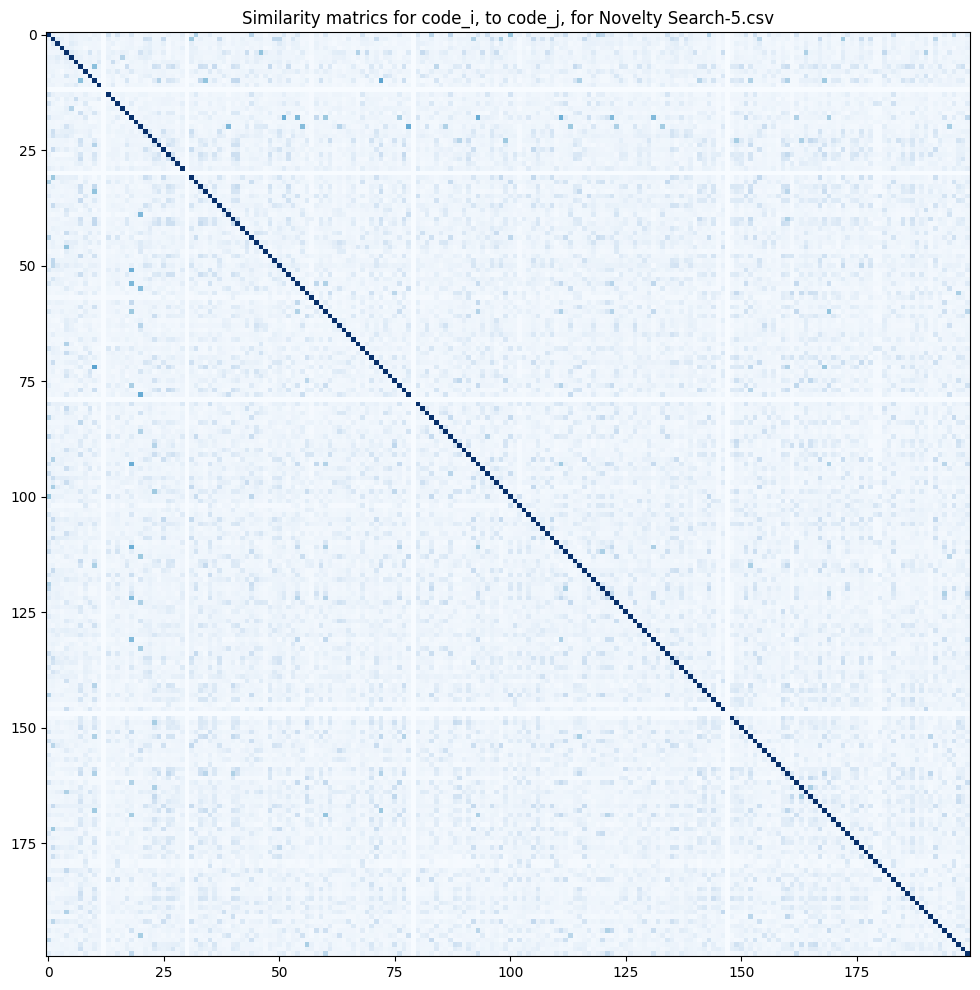

In [ ]:
# from IPython.display import display
for root, dirs, files in os.walk(os.getcwd()):
    for file in sorted(files):
        if file[-4:] == ".csv":
            filename = os.path.join(root, file)
            with open(filename) as f:
                pic = pd.read_csv(f)
                pic = pic.iloc[:, 1:]
                plt.figure(figsize=(12, 12))
                plt.imshow(pic.values, cmap='Blues')
                plt.title(f'Similarity matrics for code_i, to code_j, for {file}')
                plt.show()